<a href="https://colab.research.google.com/github/yaolihua081/AIG_PC/blob/main/Sklearn_PCTopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gensim was primarily developed for topic modeling(LDA). However, it now supports a variety of other NLP tasks such as converting words to vectors (word2vec), document to vectors (doc2vec), finding text similarity, and text summarization.

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

https://nlpforhackers.io/topic-modeling/

The link contains articles about topic modling codes

https://medium.com/@nqabell89/visualizing-unsupervised-text-classification-output-with-pyldavis-370c1784ed58

In [1]:
!pip install pyLDAvis
#restart runtime

     |████████████████████████████████| 1.7MB 5.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 260kB/s 
     |████████████████████████████████| 9.9MB 32.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=164fec91d22ff8b224751412d3d02a8a7ca2a32976e36ad39f9d03fafbd22e92
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [53]:
'''
Step 1
Loading Gensim（for LDAmodels ) and nltk libraries
'''
# pip install gensim
# Gensim
import gensim,spacy
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import models, corpora

import re, numpy as np, pandas as pd
np.random.seed(400)
import matplotlib.pyplot as plt

# NLTK Stop words
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
porter=PorterStemmer()
nltk.download('wordnet')
STOPWORDS = stopwords.words('english')
#STOPWORDS.extend(['passage','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
STOPWORDS.extend(['according','passage', 're', 'not', 'could', '_', ])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
'''
Step 2, upload files
'''
#!pip install kaggle
from google.colab import files
files.upload()

Saving PC089600items.docx to PC089600items (3).docx
Saving PC089800items.docx to PC089800items (2).docx
Saving PC089900items.docx to PC089900items (2).docx


{'PC089600items.docx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00z\x03\x87Q\xcc\x01\x00\x00\x1f\x08\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

#rea in docx file

In [43]:
'''
Step 3 define function to read in word document files and a function to prepare train and test document
'''
! pip install python-docx 
import docx


def readtxt(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

def combine_doc(num1, num2):
  total=""
  for i in range(num1,num2):
    if num1<10:
      name="PC090"+str(i)+"00"+"items.docx"
    else:
      name="PC09"+str(i)+"00"+"items.docx"
    total+=readtxt(name)
    #print(str(i))
  return total

def combine_docfile(num1, num2):
  total=""
  for i in range(num1,num2):
    if num1<10:
      name="PC089"+str(i)+"00"+"items.docx"
    else:
      name="PC089"+str(i)+"00"+"items.docx"
    total+=readtxt(name)
    #print(str(i))
  return total

In [39]:
seed_089_document=combine_docfile(6, 6)+combine_docfile(8, 9)

#for 089000 series, it is doc file. read doc file

In [ ]:
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils \
     pstotext tesseract-ocr \
     flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libasound2-dev libpulse-dev
!pip install git+https://github.com/deanmalmgren/textract

In [44]:
import textract
#text = textract.process('PC089000items.doc')
#text.decode('utf-8')  # converts from bytestring to string
#print(text)

def combine_docfile_doc(num1, num2):
  total=""
  for i in range(num1,num2):
    name="PC089"+str(i)+"00"+"items.doc"
    text=textract.process(name)
    #text.decode('utf-8')
    total+=text.decode('utf-8')
    #print(str(i))
  return total

seed_089_doc=combine_docfile_doc(0,5)  
seed_089_doc

'\nMHDA1 14\nPC089000 D\n9000. Speedball uses a soccer ball and is similar in some ways to that\n   game.  But its goal posts are borrowed from football.  A two-point drop\n   kick goal must be kicked over the crossbar from outside the end zone.  A\n   three-point field goal is scored when a ground ball is kicked between the\n   goal posts, but under the crossbar.\n   In speedball, the first step in scoring two points is kicking the ball\n\n   A. on one bounce.\n   B. under the crossbar.\n   C. between the goal posts.\n   D. from outside the end zone.\nGWnew\nPC089001 C\n9001. Jake Maclaine stared at the ocean. His frequent, long gazes out the\n   window gave little indication of the extreme impatience he felt at having\n   to be at work when his one true love - the ocean - waited for his return.\n   Since he was 14, and first learned how to surf, he went to her at least\n   once a day for as long as he could swing it (he tried to be responsible).\n   Jack Maclaine was\n\n   A. patient

In [50]:
'''
Step 4 Prepare train and test document
'''
#900 seire with docx file
train_document=combine_doc(0,10)+combine_doc(10,35)
test_document=combine_doc(35,38)
#89 series with docx file
seed_089_docx=combine_docfile(6, 6)+combine_docfile(8, 9)
#all 900 series
seed_900_docx=combine_doc(0,10)+combine_doc(10,35)+combine_doc(35,38)

#all files , 900 series+800 series with docx file, 800 series with doc file
all_document=seed_900_docx
len(all_document)

4257390

In [65]:
seed_089_docx_tokens = re.split(r'NEWSMS|New HumRRO', seed_089_docx)
seed_089_docx_tokens=seed_089_docx_tokens[1:]
print(seed_089_docx_tokens[0])
len(seed_089_docx_tokens) #96

 TO26 A2000000
A2089800 A
9800.	In the Black Hills of South Dakota, it is possible to gaze upon the faces of four American presidents: George Washington, Thomas Jefferson, Abraham Lincoln, and Theodore Roosevelt. Their faces have resided together, sculpted into the side of Mount Rushmore, since 1941. The sculptor who directed this ambitious project was Gutzon Borglum, and he oversaw its creation for fourteen years. Each president was memorialized, in part, for a particular contribution to the United States: Washington because he led the colonists to victory in the American Revolution, Jefferson because he acquired the Louisiana Territory from France, Lincoln because he worked to preserve the Union and free the slaves, and Roosevelt because he advanced the construction of the Panama Canal.

Based on the passage, each president featured on Mount Rushmore was
A.	commemorated for a significant achievement.
B.	a successful part of America's military history.
C.	important to the development 

96

In [64]:

seed_089_doc_tokens = re.split(r'NEW|NEWMH|PC|PCLEFTOVERS', seed_089_doc)
seed_089_doc_tokens=seed_089_doc_tokens[1:]
print(seed_089_doc_tokens[1])
len(seed_089_doc_tokens) #643

#seed_089__docx_tokens = re.split(r'NEWSMS|New HumRRO', seed_089_docx)
#print(see_089_docx_tokens[0[]])


089001 C
9001. Jake Maclaine stared at the ocean. His frequent, long gazes out the
   window gave little indication of the extreme impatience he felt at having
   to be at work when his one true love - the ocean - waited for his return.
   Since he was 14, and first learned how to surf, he went to her at least
   once a day for as long as he could swing it (he tried to be responsible).
   Jack Maclaine was

   A. patient.
   B. a crook.
   C. a surfer.
   D. 14 years old.
RI000724    93%



643

In [66]:
'''
Change all text to lower cases
Step 5. Each pagraph/item is splixt by "New HumRRO
Train_tokens is a list and containes PC items/paragraph
'''

#train_tokens = re.split(r'New HumRRO|NEW HumRRO', train_document)
#train_tokens=train_tokens[1:]
#test_tokens = re.split(r'New HumRRO|NEW HumRRO', test_document)
#test_tokens=test_tokens[1:]

all_tokens=re.split(r'New HumRRO|NEW HumRRO', all_document)
all_tokens=all_tokens[1:]

all_tokens[249]=all_tokens[249].replace("B	inform the reader.","B.	inform the reader.")
print(all_tokens[249]) #40

all_tokens[261]=all_tokens[261].replace("B	communicate information about the liquids.","B.	communicate information about the liquids.")#B is the key
print(all_tokens[261]) #40

all_tokens[285]=all_tokens[285].replace("B	the best fit for your needs.","B.	the best fit for your needs.") #B is the key
print(all_tokens[285]) #40

all_tokens[417]=all_tokens[417].replace("C	a subordinate","C.	a subordinate") #C is the key
print(all_tokens[417]) 
all_tokens[422]=all_tokens[422].replace("A	stand-on","A.	stand-on") #B is the ky(first line, A is the second line key)
print(all_tokens[422]) #40

all_tokens[471]=all_tokens[471].replace("C	Most caves are created by moving water.","C.	Most caves are created by moving water.") # C is the key
print(all_tokens[471]) #40

all_tokens[557]=all_tokens[557].replace("B	leaves.","B.	leaves.") #B is the key
print(all_tokens[557]) #40
all_tokens[633]=all_tokens[633].replace("A	The heels come firmly down.","A.	The heels come firmly down.")#A is the key
print(all_tokens[633]) 
all_tokens[757]=all_tokens[757].replace("C	A wise prince will not fear a mean reputation if the outcome is good for the people.","C.	A wise prince will not fear a mean reputation if the outcome is good for the people.")
print(all_tokens[757]) # C is the key

all_tokens[2177]=all_tokens[2177].replace("B	The fabrication of solar energy panels can be made more environmentally friendly.","B.	The fabrication of solar energy panels can be made more environmentally friendly.")
print(all_tokens[2177]) #B is the key

 TO2 B3000149 B
B3090249 B
0249.	According to the National Institute of Mental Health, depression is most likely caused by a combination of genetic, biological, environmental, and psychological factors. Depressive illnesses are disorders of the brain. Longstanding theories suggest that in people with depression, important neurotransmitters -- chemicals that brain cells use to communicate -- are out of balance. But this has been difficult to prove. Brain-imaging technologies, such as magnetic resonance imaging (MRI), have shown that the brains of people who have depression look different than those of people without depression. The parts of the brain involved in mood, thinking, sleep, appetite, and behavior appear different. But these images do not reveal why the depression has occurred. They also cannot be used to diagnose depression.

In the passage, the author's purpose is most likely to

A.	warn the reader.
B.	inform the reader.
C.	reassure the reader.
D.	persuade the reader.

 TO2 

#Lemmazitation, stopwords, clean lenght <=3, and Tokenize Sentences

In [67]:
print(all_tokens[2])

 TO9 A2000389 C
A2090002 A
0002.	Many children are bothered by indoor allergies, and it is often difficult to diagnose the specific allergen causing their symptoms. If your child suffers from allergies, then it is useful to examine the place in your home where your child spends a majority of time – the bedroom! To ensure a bed is protected from dust mites, the most important priority is to remove all bedding and wash it in hot water. Next, use plastic allergy-proof covers for all components of the bed to seal out pests. Keep stuffed animals off the rugs, and preferably avoid these toys all together. Eliminate curtains, or, if that's not possible, make sure to clean them frequently. Finally, to keep the air in the entire room clean, consider using a high efficiency particulate air filter. Taken together, these steps will help you keep your child's bedroom allergen-free.

According to the passage, a child who suffers from indoor dust mite allergies

A.	should not be encouraged to play wi

In [69]:
'''
Step 6 Write a function to perform the pre processing steps on the entire dataset
'''
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
            
    return result

'''
Step 7
'''
'''
train_processed_docs = [] # a list of a list of word

for doc in train_tokens:
    train_processed_docs.append(preprocess(doc))
'''
all_processed_docs = [] # a list of a list of word

for doc in all_tokens:
    all_processed_docs.append(preprocess(doc))
'''
test_processed_docs = [] # a list of a list of word

for doc in test_tokens:
    test_processed_docs.append(preprocess(doc))
'''

'\ntest_processed_docs = [] # a list of a list of word\n\nfor doc in test_tokens:\n    test_processed_docs.append(preprocess(doc))\n'

#Gensim to run LDA Model

#Let’s form the bigram and trigrams using the Phrases model. This is passed to Phraser() for efficiency in speed of execution.

Next, lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

We keep only these POS tags because they are the ones contributing the most to the meaning of the sentences. Here, I use spacy for lemmatization.

In [70]:
# Build the bigram and trigram models
# !python3 -m spacy download en  # run in terminal once
def process_words(data_words, stop_words=STOPWORDS, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
  """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
  bigram = gensim.models.Phrases(data_words, min_count=2, threshold=50) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)
  texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
  texts = [bigram_mod[doc] for doc in texts]
  texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
  texts_out = []
  nlp = spacy.load('en', disable=['parser', 'ner'])
  for sent in texts:
    doc = nlp(" ".join(sent)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
  texts_out = [[word.lower() for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
  return texts_out



In [220]:
print(all_tokens[1])

 TO9 A2000384 C
A2090001 C
0001.	You may have heard of Bigfoot, but have you heard of Yeti, Almas, or Yeren? These are names from different parts of the world for a giant ape-like specimen sought by cryptozoologists, who hope to find and study such unknown creatures. Claims about the existence of a giant ape-like creature that inhabits remote mountainous regions have provoked controversy, due to a lack of scientifically-accepted evidence. However, there is a long history of sightings from hikers in the Pacific Northwest of a Bigfoot type of creature or its footprints, and the traditions of many Native American tribes feature giant apes. Cryptozoologists argue that perhaps, like the Central African mountain gorilla that was discovered in 1903 and has been studied by primatologists, it's just a matter of time before proof of Bigfoot silences the skeptics.

According to the passage, the people most likely to believe in a Yeti or a Yeren are

A.	primatologists.
B.	mountain hikers.
C.	crypt

In [71]:
#train_data_ready = process_words(train_processed_docs)  # processed Text Data!
#test_data_ready = process_words(test_processed_docs) 
all_data_ready = process_words(all_processed_docs) 

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [72]:


'''
Step 8
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
#gensm_dictionary = gensim.corpora.Dictionary(train_processed_docs)   
#dat=train_data_ready
dat=all_data_ready
gensm_dictionary = gensim.corpora.Dictionary(dat) 
'''
OPTIONAL STEP
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 80% of all documents
After (1) and (2), keep only the first 10000 most frequent tokens (or keep all if keep_n=None).
'''
#gensm_dictionary.filter_extremes(no_below=5, no_above=0.9, keep_n= 10000)

'''
Step 9
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [gensm_dictionary.doc2bow(doc) for doc in dat]

'''
Step 10
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
NUM_TOPICS=5 # 10 might be higher
#lda_model_gensm =  gensim.models.LdaMulticore(bow_corpus, 
#                                   num_topics = 15, 
#                                   id2word = gensm_dictionary,                                    
#                                   passes = 10,
#                                   workers = 2)
#lda_model_gensm = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics = NUM_TOPICS, id2word=gensm_dictionary, passes=15)
lda_model_gensm = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=gensm_dictionary,
                                           num_topics=NUM_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


In [73]:
import pyLDAvis
import gensim
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

panel_lda_gensm = pyLDAvis.gensim_models.prepare(lda_model_gensm, bow_corpus, gensm_dictionary)

pyLDAvis.save_html(panel_lda_gensm,'lda_gensm5.html')
panel_lda_gensm


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.299102  0.035818       1        1  30.375258
2      0.123881 -0.125581       2        1  20.221430
4     -0.184252 -0.006420       3        1  18.261980
1     -0.148805 -0.209075       4        1  15.646678
3     -0.089925  0.305258       5        1  15.494654, topic_info=        Term         Freq        Total Category  logprob  loglift
27      work  1284.000000  1284.000000  Default  30.0000  30.0000
89      take   848.000000   848.000000  Default  29.0000  29.0000
158     year  1310.000000  1310.000000  Default  28.0000  28.0000
90      time  1302.000000  1302.000000  Default  27.0000  27.0000
100      day   959.000000   959.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
734    build   254.707572   469.625120   Topic5  -4.5771   1.2529
111    offer   187.021508   384.786720   Topic5  -4.8860   1.1432
449  complet   166.310402   270.723135   Topic5  -5.0034   1.3774
486    right   151.326879   230.303127   Topic5  -5.0978   1.4447
830     open   144.335323   365.057450   Topic5  -5.1451   0.9368

[236 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2311      2  0.991979  afternoon
875       5  0.994570        age
55        4  0.994816        air
95        5  0.995466     appear
1229      4  0.989026   approach
...     ...       ...        ...
1950      2  0.997162       wood
190       1  0.998226       word
27        5  0.999260       work
157       1  0.996734      write
158       1  0.998965       year

[239 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 4])

In [ ]:
doc=all_data_ready[0]
#gensm_dictionary.doc2bow(doc)
len(set(doc)),len(doc)
gensm_dictionary.num_docs #3800
gensm_dictionary.num_pos#159842, number of processed words
gensm_dictionary.num_nnz#129578, sum of number of unique words in all document
len(gensm_dictionary)#10357, number of words--columns in the matrix, after filter and remove(no_below=15, no_above=0.8, keep_n= 10000), there are 1586
#'test' in gensm_dictionary.token2id

10357

In [ ]:
ldamodel=lda_model_gensm
corpus=bow_corpus #list of  length 3800(number of document),  of list of things like (0,3), (1,1), document is the row, columns is the words. how many times the word appeared in the document
#ldamodel[corpus][0]
row_list=ldamodel[corpus][0]
row = row_list[0]   # [(3, 0.033020496), (4, 0.07311388), (5, 0.8738616)]
temp = sorted(row, key=lambda x: (x[1]), reverse=True)
temp#[(5, 0.87384707), (4, 0.073128454), (3, 0.033020537)]

[(3, 0.82228225),
 (4, 0.08112214),
 (2, 0.03597866),
 (0, 0.033054754),
 (1, 0.027562242)]

In [74]:
def format_topics_sentences(ldamodel=None, corpus=bow_corpus, texts=all_data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

# Display setting to show more characters in column
def TPC(ldamodel=None, corpus=bow_corpus, texts=all_data_ready):
  df_topic_lda_gensm_sents_keywords = format_topics_sentences(ldamodel, corpus, texts)
  # Format
  pd.options.display.max_colwidth = 100
  df_dominant_topic_lda_gensm = df_topic_lda_gensm_sents_keywords.reset_index()
  df_dominant_topic_lda_gensm.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
  
  sent_topics_sorteddf_mallet = pd.DataFrame()
  sent_topics_outdf_grpd = df_topic_lda_gensm_sents_keywords.groupby('Dominant_Topic')
  for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)
  # Reset Index    
  #sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
  LDA_gensm_sent_topics=sent_topics_sorteddf_mallet.reset_index()
  # Format
  LDA_gensm_sent_topics.columns = ["Document_Num","Topic_Num","Topic_Perc_Contrib", "Keywords", "Representative Text"]
  return (df_dominant_topic_lda_gensm,LDA_gensm_sent_topics)



# Each document create volums for text, questions, and answers.

In [75]:

def split_doc(PCdoc):
  ID_pattern=r'([A-B][\d]{6,7})'
  IDs = re.findall(ID_pattern, PCdoc)
  IDs_unique=IDs[1]
  Key_pattern=r'(\b[A-D]\b)'
  Keys=re.findall(Key_pattern, PCdoc)
  Keys_unique=Keys[1] 
  num=str(IDs_unique)[7:10]
  num2=str(IDs_unique)[4:7]
  num1=str(num)+str(".")
  #pattern1=r'([^.?!]*(?<=[.?\s!])According to(?=[\s.?!])[^.?!]*[.?!])'
  #pattern2=r'([^.?!]*(?<=[.?\s!])Based on(?=[\s.?!])[^.?!]*[.?!])'
  #question=re.findall(pattern1,PCdoc) + re.findall(pattern2,PCdoc)
  key=str(Keys_unique)+str(".")
  #key=str(Keys_unique)
  split_doc = PCdoc.split("\n\n")
  text=split_doc[0]
  #question=split_doc[-2]
  #answer=split_doc[-1]
  if (len(split_doc)==3):
    question=split_doc[1]
    answer=split_doc[2]
  elif (len(split_doc)==2): 
    question=split_doc[0]
    answer=split_doc[1]
  elif (len(split_doc)>=4): 
    if (split_doc[-1] ==''):
      question=split_doc[-3]
      answer=split_doc[-2]
    else:
      question=split_doc[-2]
      answer=split_doc[-1]  

  
  part00="(?=[\s.?!])[^.?!]*[.?\s!])"
  pattern4=str("(")+str(key)+str(part00)
  anstr=re.findall(pattern4,answer)
  #print([answer,anstr])
  questr = question[0].replace("\n", " ")
  questr = questr.replace("\t", " ")
  questr = questr.replace("A.", " ")
  questr = questr.replace(key, " ")
  anstr1 = anstr[0].replace(key, "")   
  anstr1 = anstr1.replace("\t", "")
  anstr1 = anstr1.replace("\nA", " ")
  anstr1 = anstr1.replace("\nB", " ")
  anstr1 = anstr1.replace("\nC", " ")
  anstr1 = anstr1.replace("\nD", " ")
  anstr1 = anstr1.replace("\n", " ")
  text=text.replace(IDs_unique,"")
  text=text.replace(IDs[0],"")
  text=text.replace(num1,"")
  text=text.replace(num2,"")
  text=text.replace(Keys_unique,"")
  text=text.replace("\n","")
  text=text.replace("\t","")
  #text=text.replace("TO9","")
  #text=text.replace("TO45","")
  #print([questr,anstr])
  df ={'ID_Name':IDs_unique ,'Key':Keys_unique ,'Passage': text,'Question': question,'Answer': anstr1}
  df=pd.DataFrame(df,index=[num])
  return df
def ID(PC_tokens):
  df=pd.DataFrame()
  i=0
  for PCdoc in PC_tokens:
    df=pd.concat([df, split_doc(PCdoc)]) 
    i=i+1
    #print(i) 
  return df

all_ID=ID(all_tokens)  #201 is not working, 249 fixed the answer
all_ID

<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence \s
<input>:36: DeprecationWarning: invalid escape sequence 

ID_Name  ...                                             Answer
0   A2090000  ...  may be revitalized due to health issues with s...
1   A2090001  ...                                  cryptozoologists.
2   A2090002  ...  should not be encouraged to play with stuffed ...
3   A2090003  ...                              ancient Roman money .
3   A2090003  ...                                   Central America 
..       ...  ...                                                ...
5   B5093795  ...                                         stillness.
6   B5093796  ...                                        dismissive.
7   A3093797  ...  Installed safety latches on their kitchen appl...
8   B2093798  ...  Some buildings are kept too cool during the su...
9   B4093799  ...                                        nostalgic .

[3800 rows x 5 columns]

#Creat a set of answers, a set that contains all possible answeres(answeres and distractors). A set of questions.

In [76]:
LDA_gensm_dominant_topics, LDA_gensm_sent_topics=TPC(ldamodel=lda_model_gensm, corpus=bow_corpus, texts=all_data_ready) 

temp=pd.DataFrame(all_ID['Answer'].values)
temp1=pd.concat([temp,LDA_gensm_dominant_topics],axis=1)
#LDA_gensm_dominant_topics.columns = ['ID','Key','Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

temp2=pd.concat([pd.DataFrame(all_ID['Question'].values),temp1],axis=1)
temp3=pd.concat([pd.DataFrame(all_ID['Passage'].values),temp2],axis=1)
temp4=pd.concat([pd.DataFrame(all_ID['Key'].values),temp3],axis=1)
LDA_gensm_dominant_topics=pd.concat([pd.DataFrame(all_ID['ID_Name'].values),temp4],axis=1)
LDA_gensm_dominant_topics.columns=['ID','Key', 'Passage','Question','Answer','Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

#LDA_gensm_sent_topics
pd.DataFrame(LDA_gensm_dominant_topics).to_csv('LDA_gensm_dominant_topics5.csv')
pd.DataFrame(LDA_gensm_sent_topics).to_csv('LDA_gensm_sent_topics5.csv')

LDA_gensm_dominant_topics

ID  ...                                                                                                 Text
0     A2090000  ...  [today, grant, blue_jean, blue, origin, color, synthet_dye, develop, plant, respon, deep, rich, ...
1     A2090001  ...  [hear, hear, name, differ, part, world, giant_ape, speciman, seek, claim, exist, giant_ape, regi...
2     A2090002  ...  [child, bother, indoor, suffer, home, child, spend, major, time, bedroom, ensur, bed, wash, hot,...
3     A2090003  ...  [famous, medium, archaeologist, find, includ, scrap, papyrus, date, believ, roman, power, man, d...
4     A2090003  ...  [polynesian, spread, rapid, plant, seed, need, settlement, polynesian, crop, believ, domest, unc...
...        ...  ...                                                                                                  ...
3795  B5093795  ...  [midnight, shiver, cold, wind, sweep, swift, current, air, leaf, common, cut, appear, infect, bu...
3796  B5093796  ...  [filigre, enter, turn, speak, hold, hand, note, expect, rememb, man, stand, night, hous, scrutin...
3797  A3093797  ...  [task, plastic, plug, unu, instal, childproof, lock, reach, small, child, instal, safeti, latch,...
3798  B2093798  ...  [despit, warm, outdoor, temperatur, summer, light, close, hand, case, build, air, condit, set, l...
3799  B4093799  ...  [grow, parent, treat, dinner, special, music, start, prepar, usual, salad, spend, love, prepar, ...

[3800 rows x 10 columns]

In [ ]:
'''
Step 11
For each topic, we will explore the words occuring in that topic and its relative weight
'''
#for idx, topic in lda_model_gensm.print_topics(-1):
#    print("Topic: {} \nWords: {}".format(idx, topic ))
#    print("\n")

'''
Step 10
Preview BOW for our sample preprocessed document
'''
#document_num = 20
#bow_doc_x = bow_corpus[document_num]

#for i in range(len(bow_doc_x)):
#    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
#                                                     gensm_dictionary[bow_doc_x[i][0]], 
#                                                     bow_doc_x[i][1]))

#NLTK package
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [ ]:
'''

This is another code that use "Englis Stopword and remv some with length less than 2, no Bigram or triGram
'''

def clean_text(text):
    tokenized_text = word_tokenize(porter.stem(text.lower()))
    #tokenized_text = word_tokenize(lemmatize_stemming(text.lower()))
    #tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if len(t)>2 and t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    #cleaned_text=[t for t in cleaned_text if len(t)>3]
    return cleaned_text
 # For gensim we need to tokenize the data and filter out stopwords

#data=train_tokens

data=all_tokens
tokenized_data = []
for text in data:
    tokenized_data.append(clean_text(text))
    
dat=process_words(tokenized_data)
#dat=tokenized_data
#from gensim import models, corpora

# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(dat)

dictionary.filter_extremes(no_below=7, no_above=0.6, keep_n= 100000)# , this code impact the results a lot
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in dat]
 
# Have a look at how the 20th document looks like: [(word_id, count), ...]
print(corpus[20])
# [(12, 3), (14, 1), (21, 1), (25, 5), (30, 2), (31, 5), (33, 1), (42, 1), (43, 2),  ...
NUM_TOPICS=10
# Build the LDA model
lda_model_nltk =  gensim.models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

# Build the LSI model
lsi_model_nltk = models.LsiModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[(28, 1), (33, 1), (46, 1), (131, 1), (155, 3), (162, 8), (242, 1), (247, 1), (395, 1), (432, 2), (577, 1), (583, 1), (625, 1), (633, 1), (634, 1), (648, 3), (669, 1), (682, 3), (700, 4), (708, 1), (709, 2), (710, 3), (711, 1), (712, 1), (713, 1), (714, 1), (715, 5), (716, 2), (717, 1), (718, 1), (719, 1), (720, 1), (721, 1), (722, 6), (723, 1), (724, 1), (725, 1), (726, 1), (727, 1), (728, 1)]


In [ ]:
topics = lda_model_gensm.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.027*"year" + 0.017*"know" + 0.015*"author" + 0.013*"hous"')
(1, '0.034*"take" + 0.029*"time" + 0.021*"water" + 0.018*"order"')
(2, '0.012*"tree" + 0.011*"night" + 0.010*"light" + 0.010*"summer"')
(3, '0.052*"work" + 0.022*"day" + 0.021*"perform" + 0.017*"job"')
(4, '0.019*"time" + 0.018*"turn" + 0.017*"correct" + 0.015*"plan"')


In [ ]:

lda_model_gensm.save('modeLDAl5.gensim')
topics = lda_model_gensm.print_topics(num_words=4)
for topic in topics:
    print(topic)

lda_model_nltk.save('modeLDAl5.nltk')
topics = lda_model_nltk.print_topics(num_words=4)
for topic in topics:
    print(topic)

lsi_model_nltk.save('modeLSIl5.nltk')
topics = lsi_model_nltk.print_topics(num_words=4)
for topic in topics:
    print(topic)        

(0, '0.050*"know" + 0.036*"look" + 0.033*"see" + 0.031*"think"')
(1, '0.050*"year" + 0.039*"take" + 0.030*"friend" + 0.026*"good"')
(2, '0.035*"peopl" + 0.030*"differ" + 0.025*"fact" + 0.024*"meet"')
(3, '0.045*"new" + 0.028*"correct" + 0.026*"job" + 0.025*"day"')
(4, '0.038*"time" + 0.022*"go" + 0.021*"perform" + 0.020*"day"')
(5, '0.087*"work" + 0.036*"year" + 0.030*"old" + 0.028*"need"')
(6, '0.048*"turn" + 0.039*"car" + 0.037*"tree" + 0.025*"window"')
(7, '0.050*"feel" + 0.038*"list" + 0.037*"book" + 0.022*"say"')
(8, '0.019*"order" + 0.017*"start" + 0.017*"soon" + 0.015*"walk"')
(9, '0.032*"water" + 0.025*"learn" + 0.024*"spend" + 0.020*"week"')
(0, '0.009*"would" + 0.006*"make" + 0.005*"light" + 0.005*"find"')
(1, '0.008*"know" + 0.007*"fruit" + 0.006*"would" + 0.006*"people"')
(2, '0.011*"use" + 0.008*"year" + 0.007*"work" + 0.005*"would"')
(3, '0.010*"would" + 0.008*"time" + 0.008*"good" + 0.007*"make"')
(4, '0.011*"water" + 0.008*"plant" + 0.007*"people" + 0.006*"would"')
(5, 

#What is the Dominant topic and its percentage contribution in each document
which document belongs predominantly to which topic

#The most representative sentence for each topic

#Frequency Distribution of Word Counts in Documents

In [ ]:
for d in LDA_gensm_dominant_topics.Text:
  print(len(d))

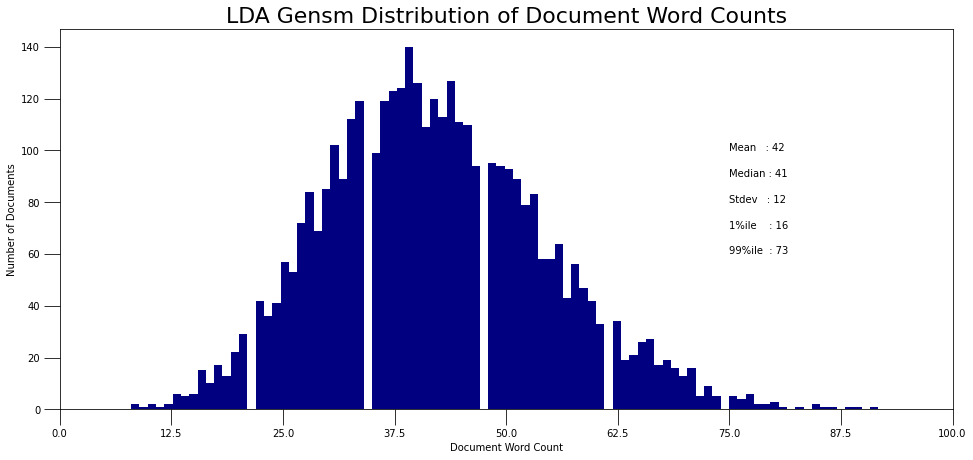

In [ ]:
doc_lens = [len(d) for d in LDA_gensm_dominant_topics.Text]
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 7))       # size in inches
# Plot
#plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(75, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(75,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(75,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(75,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(75,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('LDA Gensm Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

fig.savefig('LDA_gensm_Distribution_Doc_5.png')   # save the figure to file
plt.close(fig)    # close the figure window

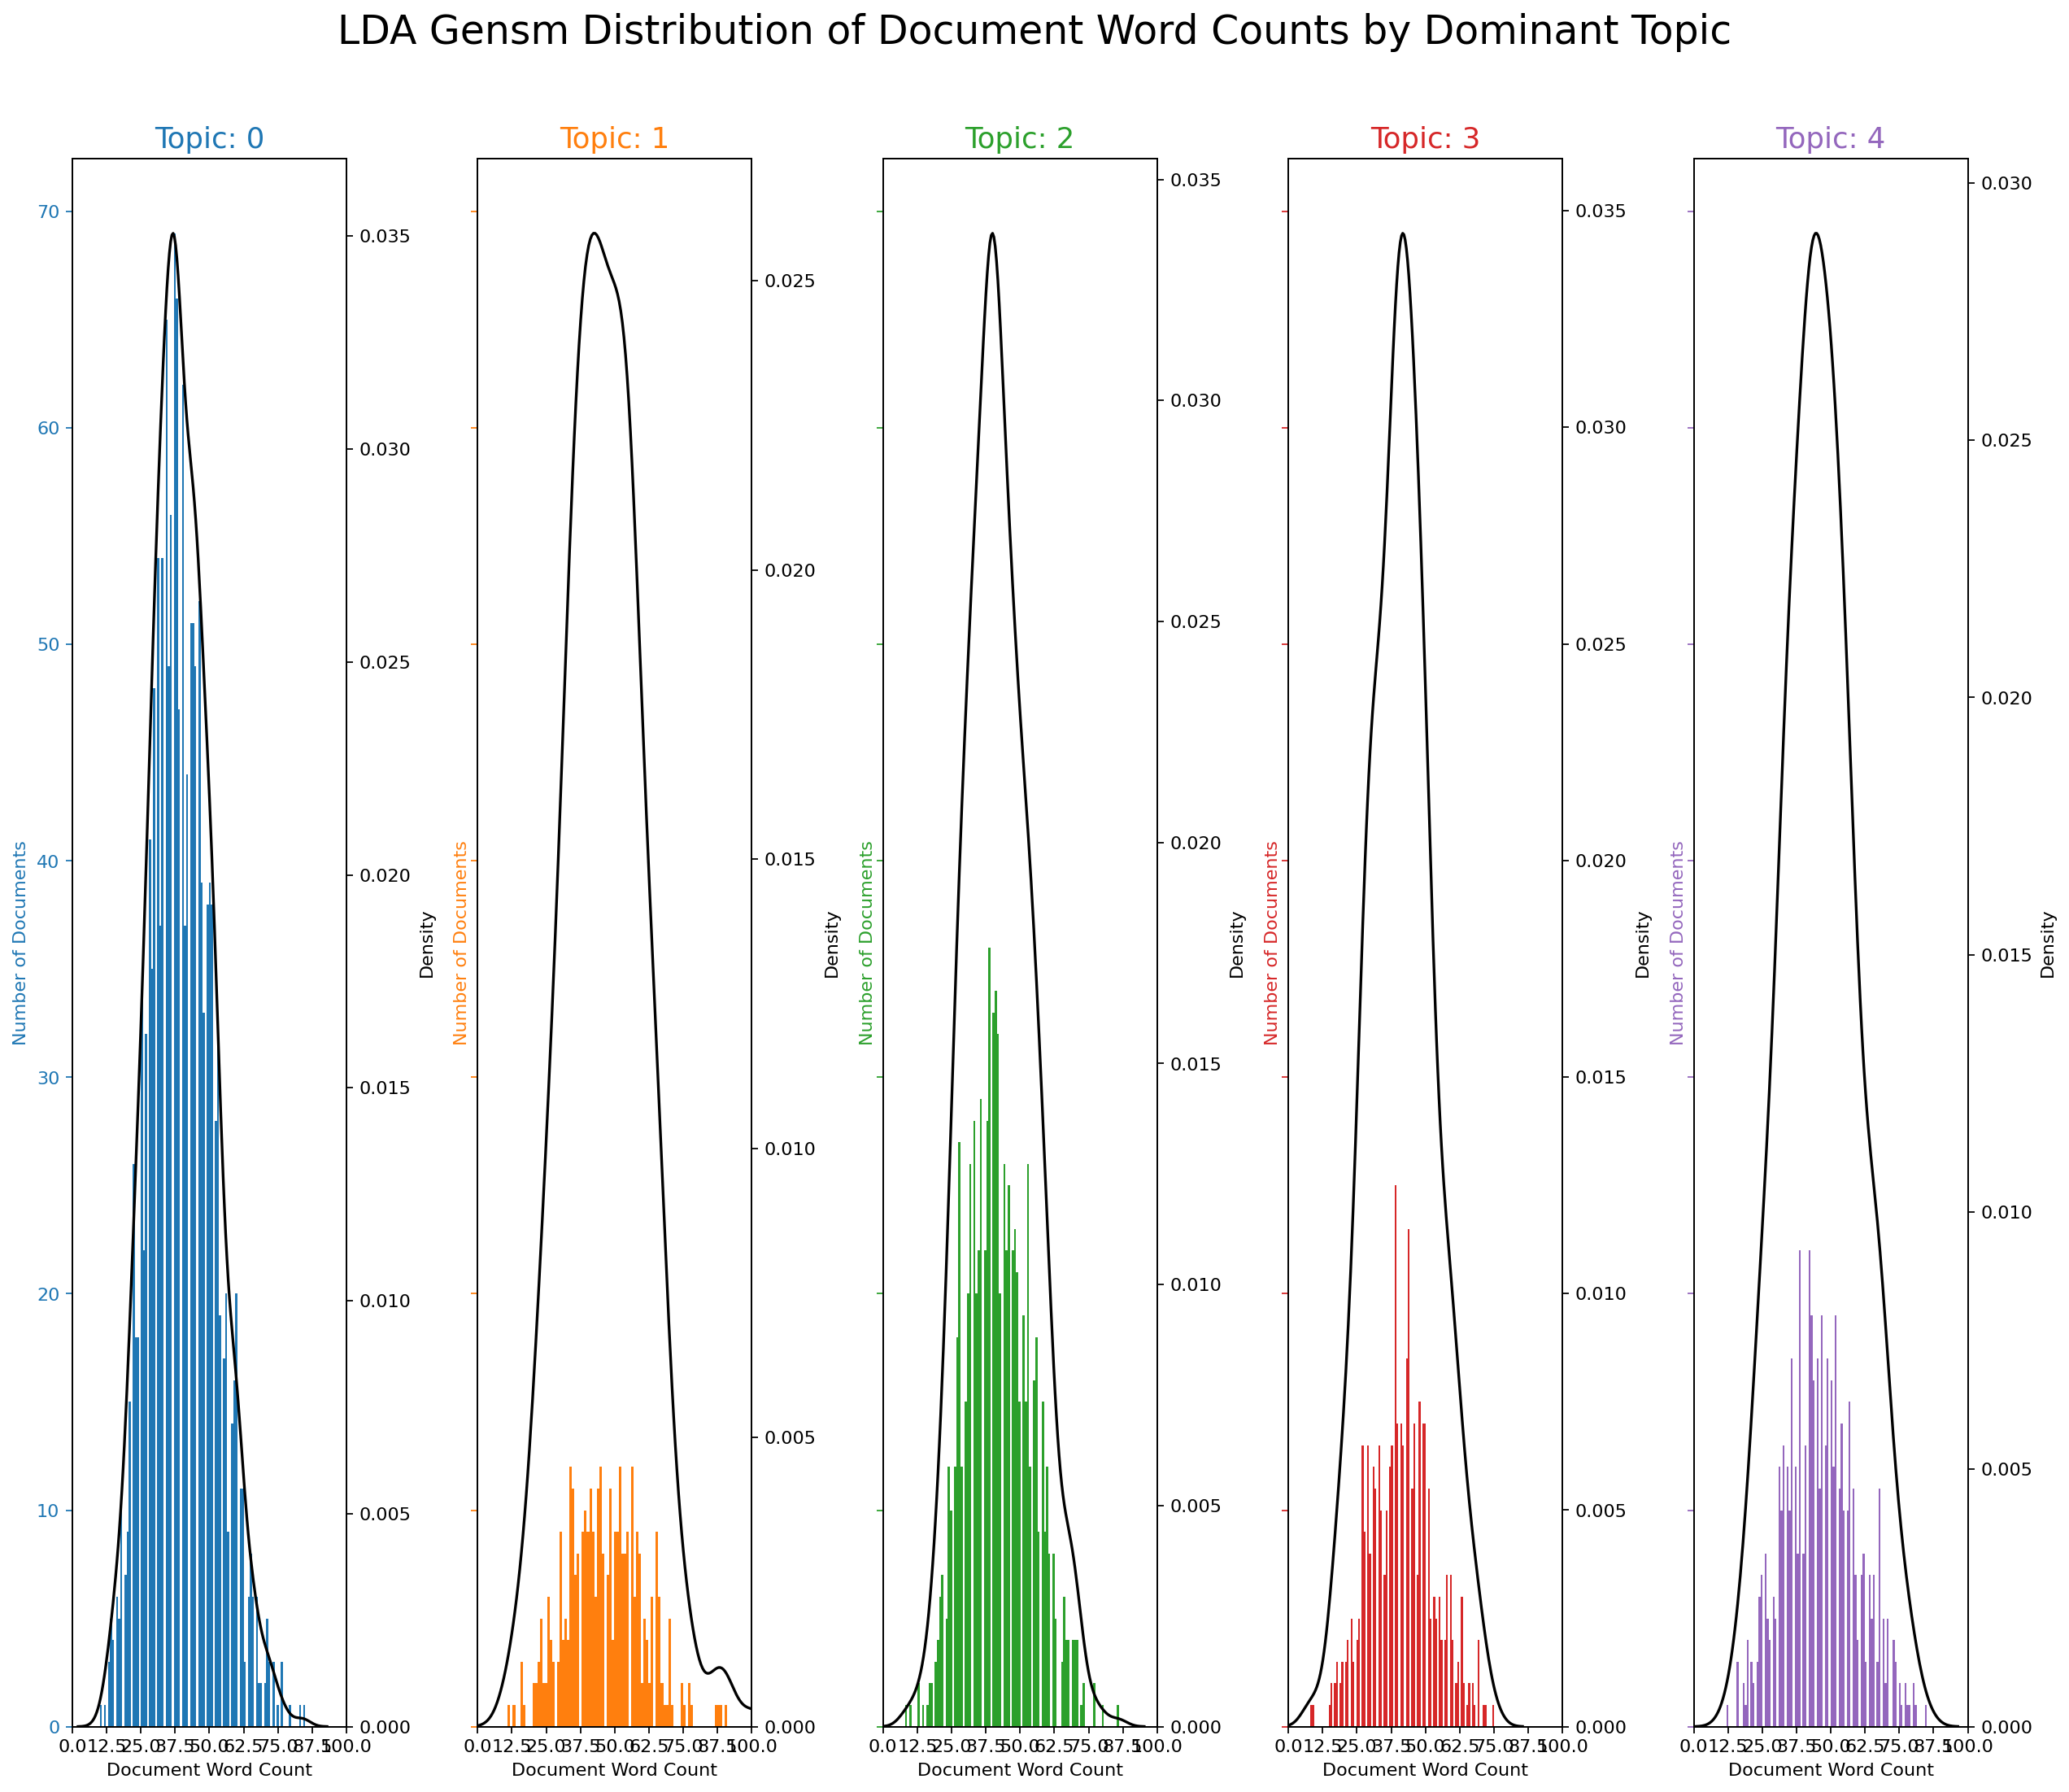

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
#LDA_gensm_dominant_topic
fig, axes = plt.subplots(1,5,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    LDA_gensm_dominant_topics_sub = LDA_gensm_dominant_topics.loc[LDA_gensm_dominant_topics.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in LDA_gensm_dominant_topics_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('LDA Gensm Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()
fig.savefig('LDA_gensm_Distribution_Doc_Dominant_Topic_5.png')   # save the figure to file
plt.close(fig) 

In [ ]:
lda_model_gensm.show_topics(formatted=False)

[(0,
  [('year', 0.026970621),
   ('know', 0.017286757),
   ('author', 0.014944481),
   ('hous', 0.012534498),
   ('see', 0.011543302),
   ('think', 0.010758254),
   ('great', 0.010433649),
   ('friend', 0.010298183),
   ('small', 0.009471052),
   ('feel', 0.009412786)]),
 (1,
  [('take', 0.033890333),
   ('time', 0.029445041),
   ('water', 0.020880882),
   ('order', 0.01788181),
   ('play', 0.016327662),
   ('go', 0.013372836),
   ('visit', 0.013257812),
   ('home', 0.012961365),
   ('room', 0.0125384955),
   ('team', 0.012228503)]),
 (2,
  [('tree', 0.012009415),
   ('night', 0.010701737),
   ('light', 0.010057564),
   ('summer', 0.010043846),
   ('look', 0.009917434),
   ('foot', 0.0092791645),
   ('season', 0.009147195),
   ('area', 0.008983027),
   ('tabl', 0.008767794),
   ('fall', 0.00856411)]),
 (3,
  [('work', 0.051847287),
   ('day', 0.02181077),
   ('perform', 0.02144726),
   ('job', 0.017295662),
   ('student', 0.01246278),
   ('begin', 0.011855666),
   ('color', 0.01136304

#Word Clouds of Top N Keywords in Each Topic


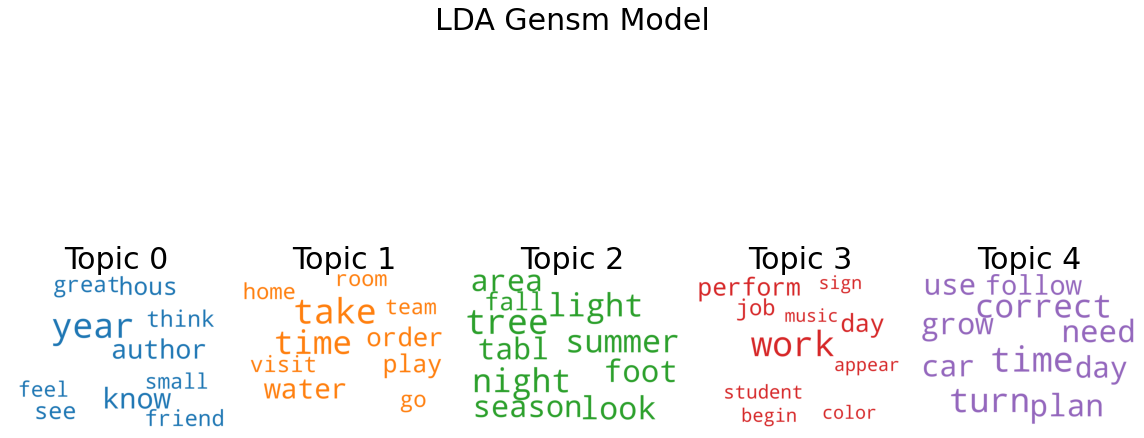

In [ ]:
# 1. Wordcloud of Top N words in each topic

from wordcloud import WordCloud, STOPWORDS

model=lda_model_gensm
#model=lda_model_nltk

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
#cols = [color for name, color in mcolors.XKCD_COLOR.items()] 
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(1,5, figsize=(16,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    fig.suptitle("LDA Gensm Model",fontsize=30)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=30))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
fig.savefig('LDA_gensm_WordCloud_5.png')   # save the figure to file
plt.close(fig) 

#Word Counts of Topic Keywords

In [ ]:
topics = lda_model_gensm.show_topics(formatted=False)
topics

[(0,
  [('year', 0.026970621),
   ('know', 0.017286757),
   ('author', 0.014944481),
   ('hous', 0.012534498),
   ('see', 0.011543302),
   ('think', 0.010758254),
   ('great', 0.010433649),
   ('friend', 0.010298183),
   ('small', 0.009471052),
   ('feel', 0.009412786)]),
 (1,
  [('take', 0.033890333),
   ('time', 0.029445041),
   ('water', 0.020880882),
   ('order', 0.01788181),
   ('play', 0.016327662),
   ('go', 0.013372836),
   ('visit', 0.013257812),
   ('home', 0.012961365),
   ('room', 0.0125384955),
   ('team', 0.012228503)]),
 (2,
  [('tree', 0.012009415),
   ('night', 0.010701737),
   ('light', 0.010057564),
   ('summer', 0.010043846),
   ('look', 0.009917434),
   ('foot', 0.0092791645),
   ('season', 0.009147195),
   ('area', 0.008983027),
   ('tabl', 0.008767794),
   ('fall', 0.00856411)]),
 (3,
  [('work', 0.051847287),
   ('day', 0.02181077),
   ('perform', 0.02144726),
   ('job', 0.017295662),
   ('student', 0.01246278),
   ('begin', 0.011855666),
   ('color', 0.01136304

#plot word importance

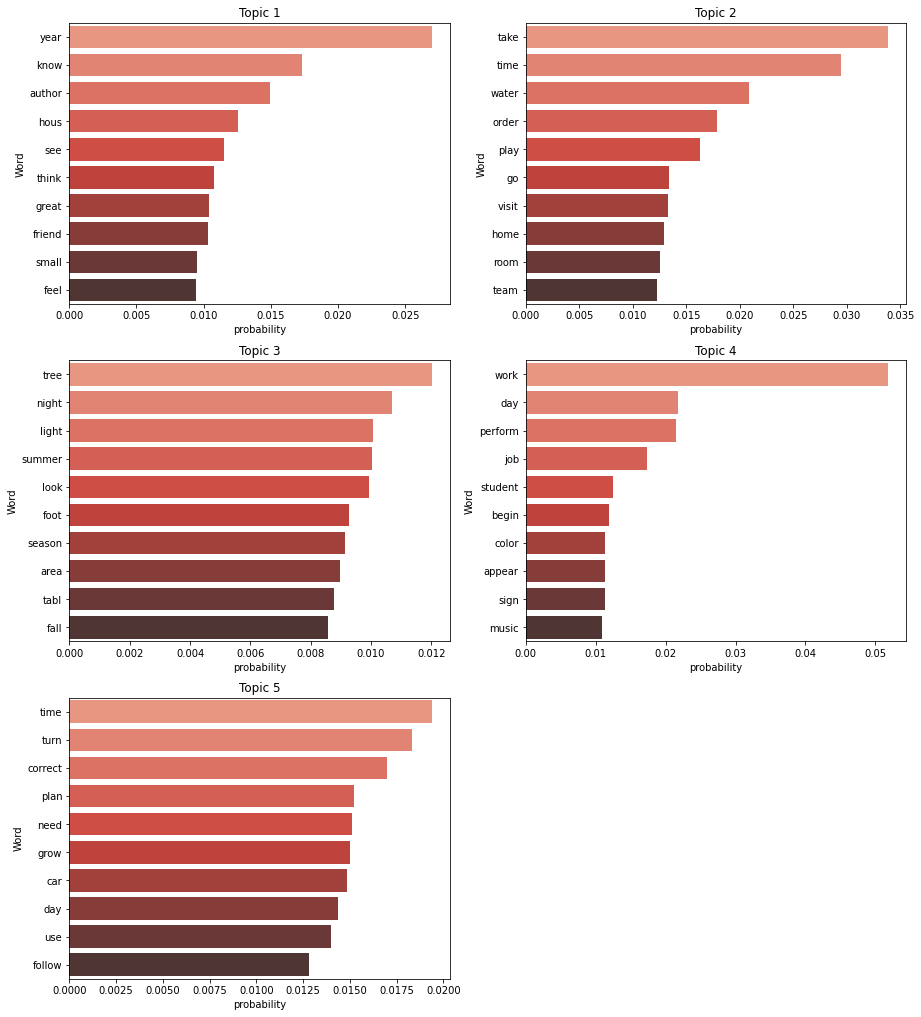

In [ ]:
fiz=plt.figure(figsize=(15,30))
NUM_TOPICS=5
for i in range(NUM_TOPICS):
    df=pd.DataFrame(lda_model_gensm.show_topic(i), columns=['Word','prob']).set_index('Word')
#     df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('Topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()
fig.savefig('LDA_gensm_Key_WordCount_Topic_5.png')   # save the figure to file
plt.close(fig) 

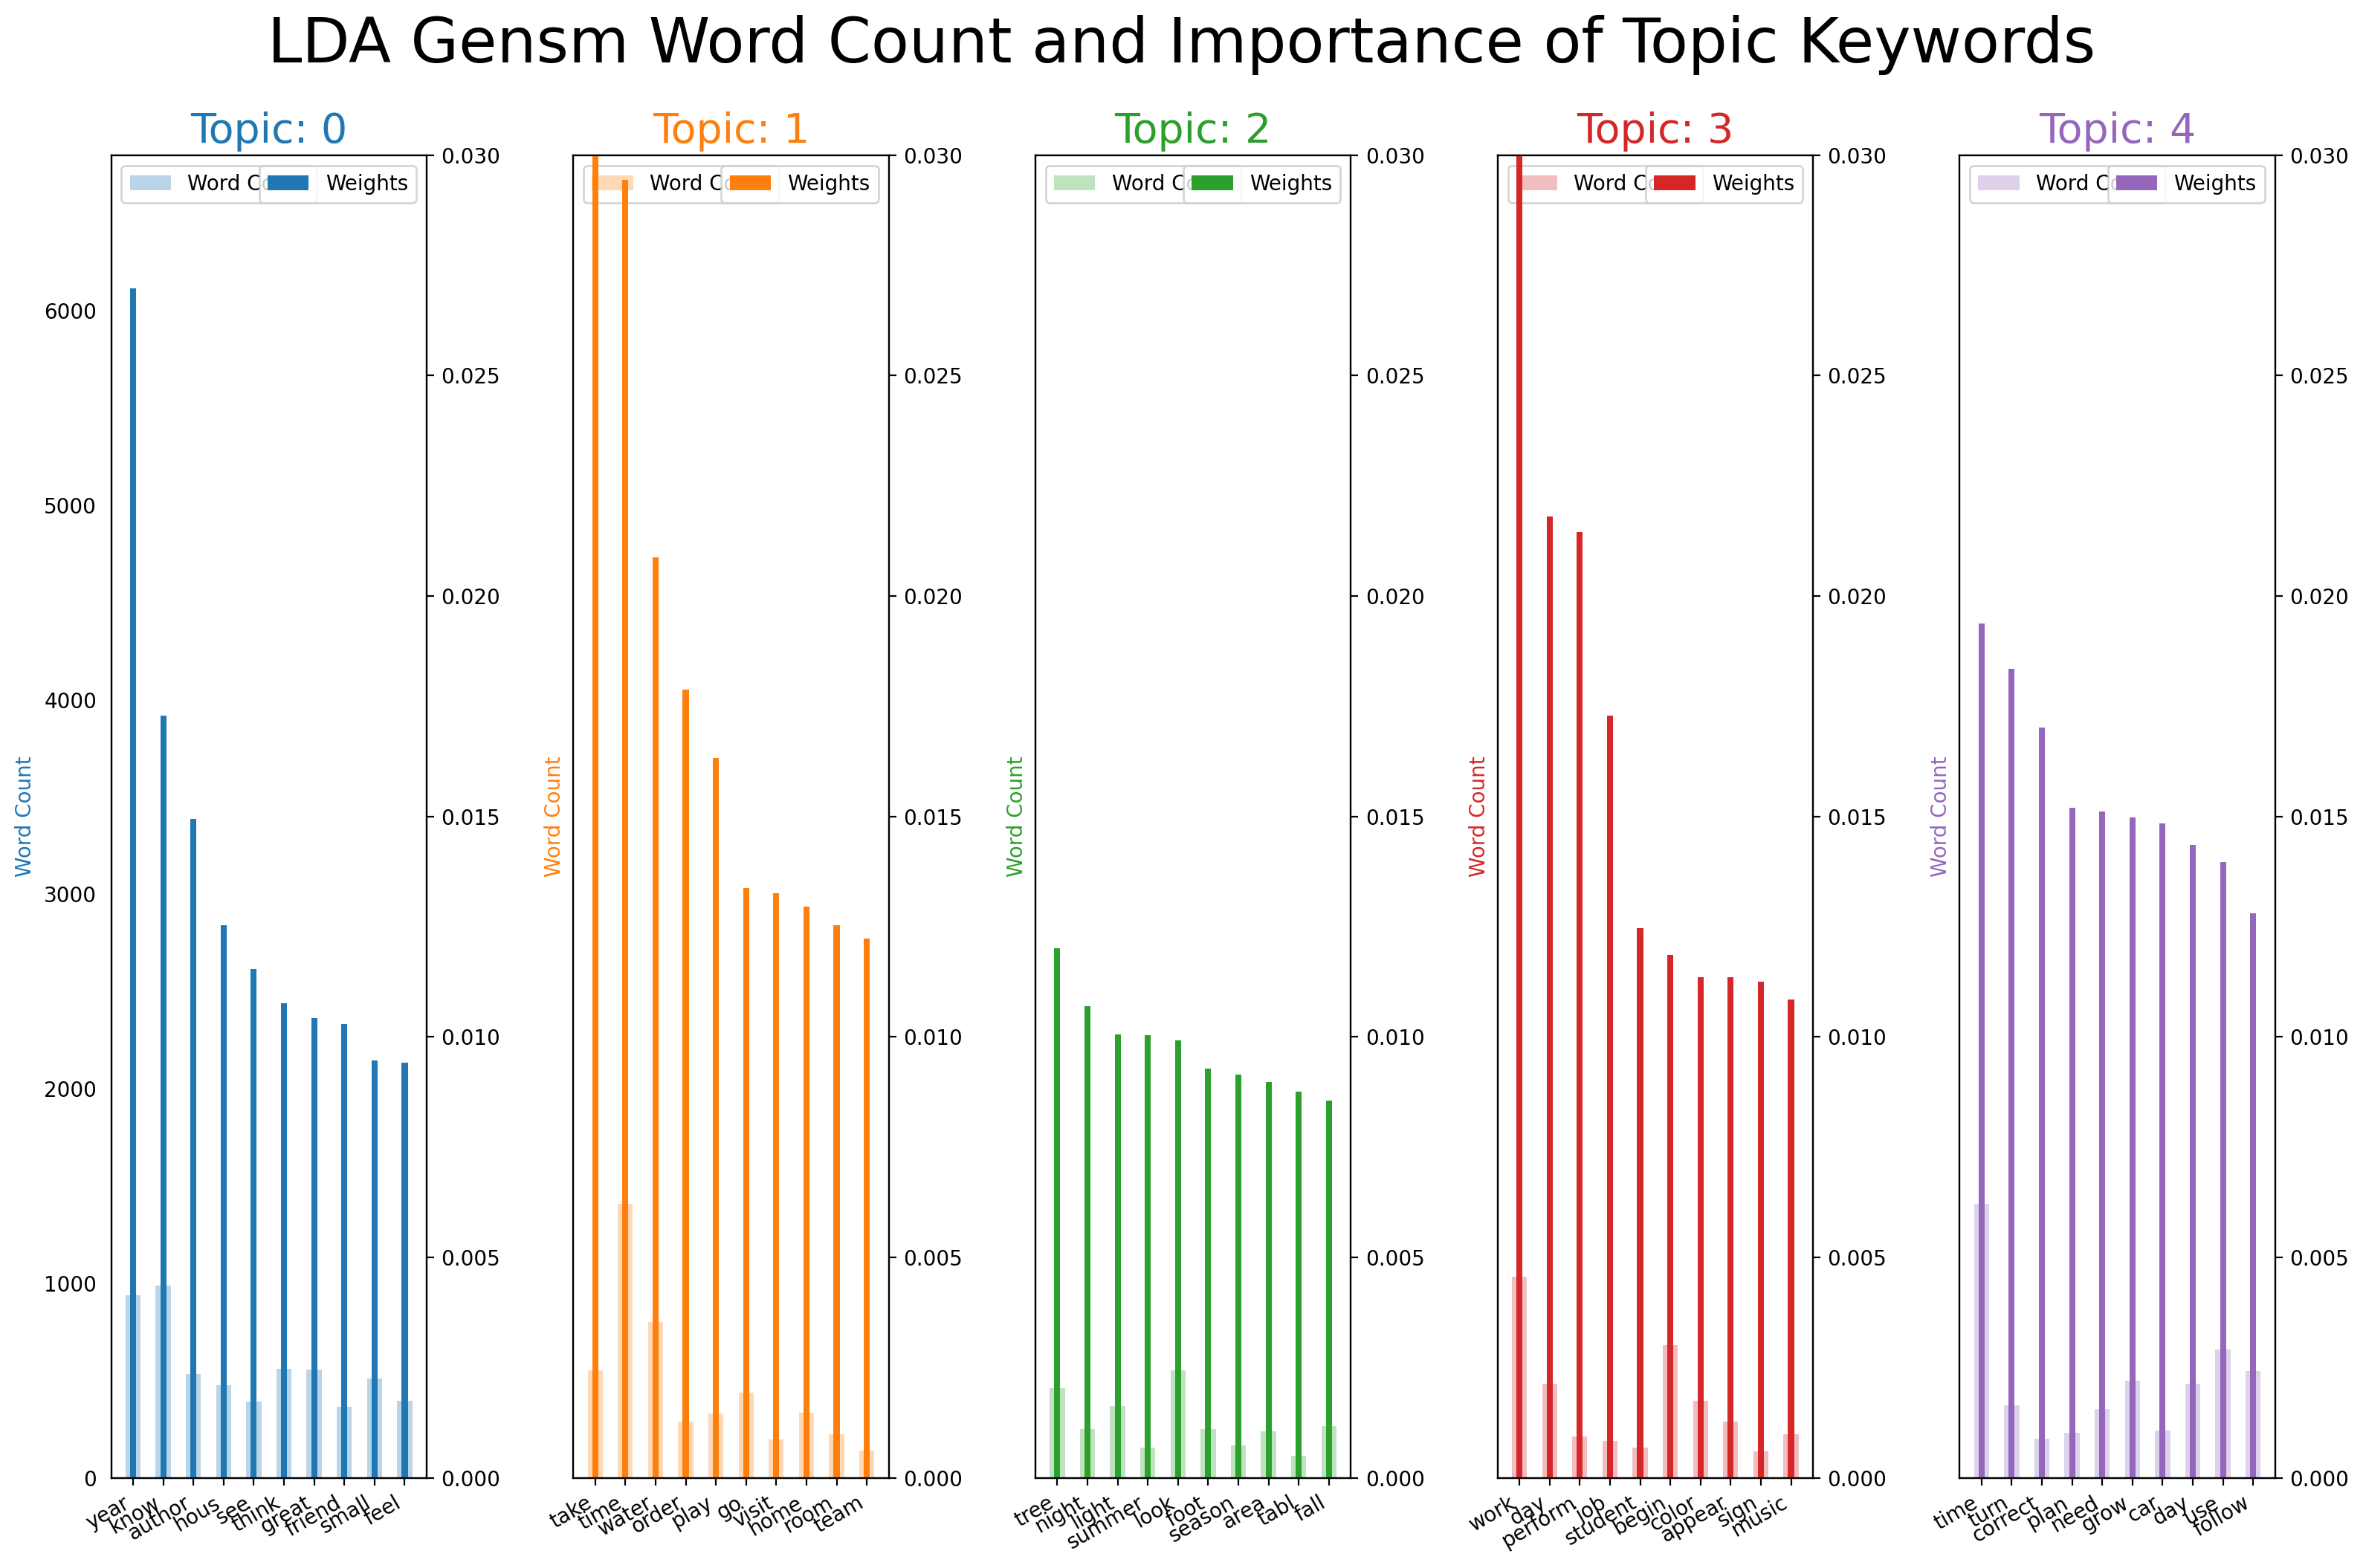

In [ ]:
from collections import Counter
topics = lda_model_gensm.show_topics(formatted=False)
data_flat = [w for w_list in all_data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(1, 5, figsize=(16,10), sharey=True, dpi=200)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 6800)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=20)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('LDA Gensm Word Count and Importance of Topic Keywords', fontsize=30, y=1.05)    
plt.show()
fig.savefig('LDA_gensm_KeyWordCount_Topic_5.png')   # save the figure to file
plt.close(fig) 

#What are the most discussed topics in the documents?

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)


dominant_topics, topic_percentages = topics_per_document(model=lda_model_gensm, corpus=bow_corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model_gensm.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

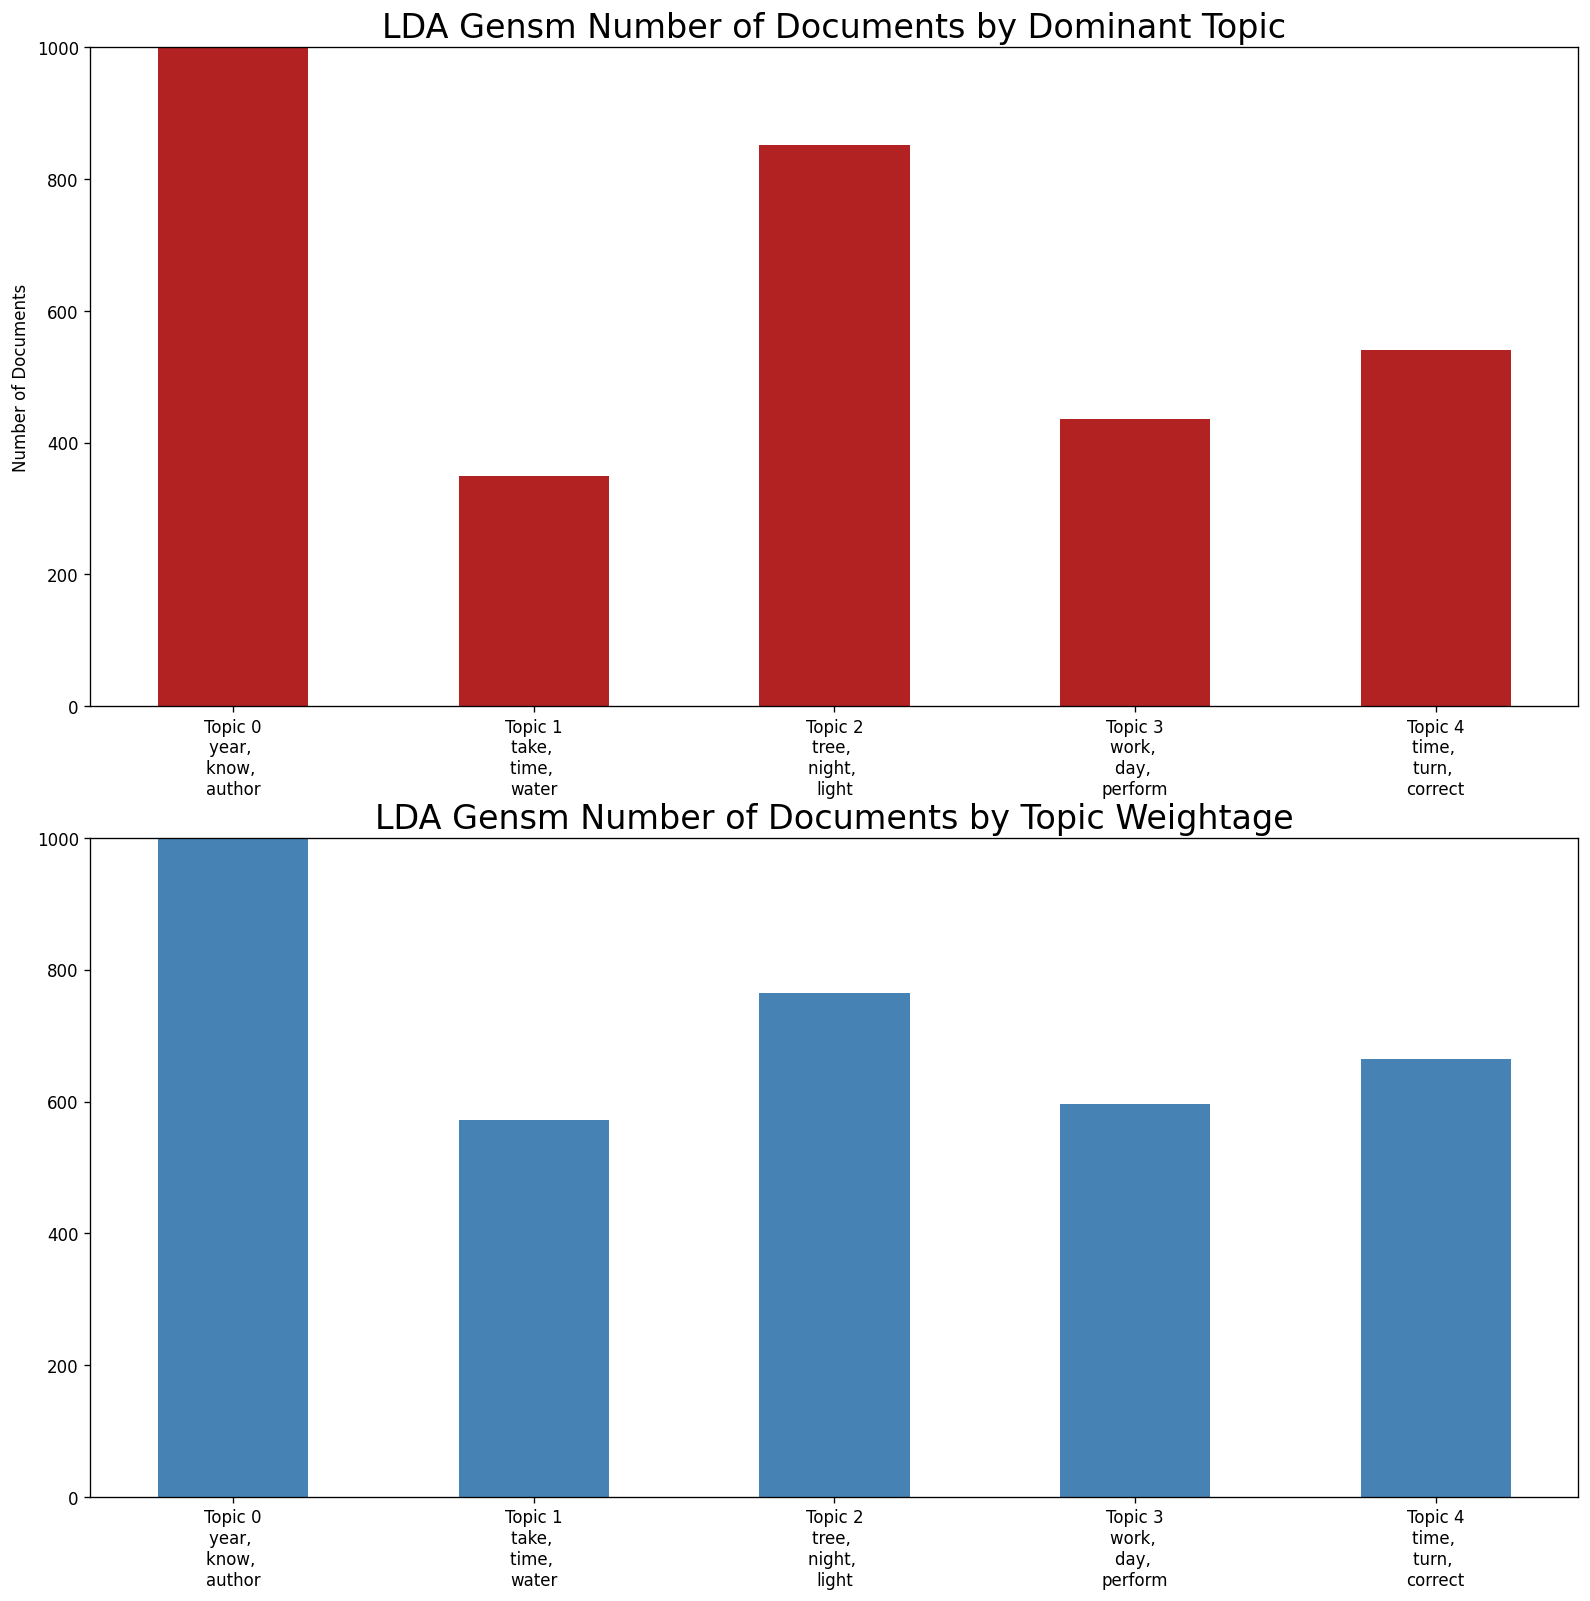

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('LDA Gensm Number of Documents by Dominant Topic', fontdict=dict(size=20))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('LDA Gensm Number of Documents by Topic Weightage', fontdict=dict(size=20))

plt.show()
fig.savefig('LDA_gensm_Topic_DocNum_5.png')   # save the figure to file
plt.close(fig) 

In [ ]:
print(data_vectorized.toarray())
print(vectorizer.get_feature_names())
#print(data[0])

#Sklearn LDA model Below

In [ ]:
data_sklearn

In [ ]:
'''
This Sklearn run LDA< LSI, NMK
'''
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

#clean corpus
def clean(texts):
  for i, line in enumerate(texts):
    texts[i] = ' '.join([x.lower() for 
        x in nltk.word_tokenize(line) if  (x not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', x) and len(x)>2) ])
  return texts

NUM_TOPICS = 10

data=all_tokens
data_sklearn=clean(data)
#ngram_range = (1,2) means unigrams and bigrams.ngram_range = (1,2) did not work well, words appear multiple times. Need to fina a way out
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),ngram_range = (1,1), min_df=5, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
#vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(),ngram_range = (1,2), min_df=5, max_df=0.9, 
#                            stop_words='english', lowercase=True, 
#                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(data_sklearn)
#print(data_vectorized.toarray())
#print(vectorizer.get_feature_names()) 

# Build a Latent Dirichlet Allocation Model
lda_model_sklearn = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model_sklearn.fit_transform(data_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(data_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Latent Semantic Indexing Model
lsi_model_sklearn = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model_sklearn.fit_transform(data_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
 
# Let's see how the first document in the corpus looks like in different topic spaces
print(lda_Z[0])
print(nmf_Z[0])
print(lsi_Z[0])
text = test_tokens[0]
x = lda_model_sklearn.transform(vectorizer.transform([text]))[0]
print(x, x.sum())



<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:28: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:28: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:28: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence \-
<input>:28: DeprecationWarning: invalid escape sequence \-
<input>:18: DeprecationWarning: invalid escape sequence 

(3800, 10)


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

(3800, 10)
(3800, 10)
[0.44884317 0.30391723 0.00105285 0.00105285 0.00105269 0.00105293
 0.00105282 0.00105279 0.00105282 0.23986985]
[0.         0.         0.1401543  0.02291551 0.24700517 0.15688934
 0.00380272 0.         0.         0.        ]
[ 1.64701005  0.08942776  1.75181772 -0.38356609 -2.09204441 -0.05742548
  0.32988622 -1.43207609 -0.48881971  0.26869406]
[0.00133357 0.07271849 0.00133388 0.00133354 0.10454927 0.00133355
 0.0538963  0.29909358 0.00133354 0.4630743 ] 1.0


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

#Word Clouds of Top N Keywords in Each Topic
#Model=lda_sklearn

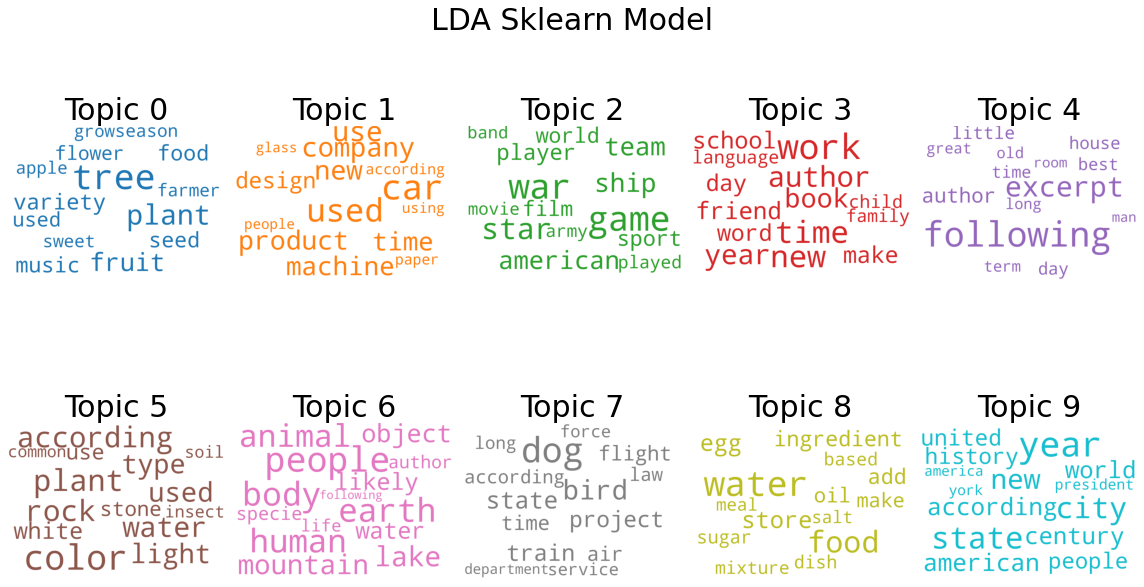

In [ ]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(2, 5, figsize=(16,10), sharex=True, sharey=True)
#plt.title("LDA Sklearn Model")
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    fig.suptitle("LDA Sklearn Model",fontsize=30)
    topic=lda_model_sklearn.components_[i]
    topic_words = dict([(vectorizer.get_feature_names()[i] , topic[i]) for i in topic.argsort()[:-15:-1]])
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=30))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()

plt.show()
fig.savefig('LDA_Sklearn_WordCloud_10.png')   # save the figure to file
plt.close(fig) 

In [ ]:
def format_topics_sentences(model=None, texts=data_sklearn):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for text in texts:
        x=model.transform(vectorizer.transform([text]))[0]
        topic_num = np.argmax(x)
        prop_topic=x[topic_num] 
        topic=lda_model_sklearn.components_[topic_num]
        topic_keywords=[vectorizer.get_feature_names()[i] for i in topic.argsort()[:-15:-1]]
        sent_topics_df = sent_topics_df.append(pd.Series([topic_num, round(prop_topic,4), topic_keywords]), ignore_index=True)
            
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model=lda_model_sklearn, texts=data_sklearn)

# Format
LDA_sklearn_dominant_topics = df_topic_sents_keywords.reset_index()
LDA_sklearn_dominant_topics.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


pd.DataFrame(LDA_sklearn_dominant_topics).to_csv('LDA_sklearn_dominant_topics10.csv')
LDA_sklearn_dominant_topics

Document_No  ...                                                                                                 Text
0               0  ...  today may take granted blue jeans indeed blue origins color before synthetic dyes developed indi...
1               1  ...  you may heard bigfoot heard yeti almas yeren these names different parts world giant ape-like sp...
2               2  ...  many children bothered indoor allergies often difficult diagnose specific allergen causing sympt...
3               3  ...  rulers throughout egypt history cleopatra may famous she focus numerous operas hollywood films b...
4               4  ...  polynesian colonists originally southeast asia spread rapidly throughout south pacific islands p...
...           ...  ...                                                                                                  ...
3795         3795  ...  the following excerpt midnight fantasy thomas bailey aldrich tranquil june night moon clusters s...
3796         3796  ...  the following excerpt the filigree ball anna katherine green jeffrey sitting back door entered t...
3797         3797  ...  marcia juan baby crawling within months decided baby-proof home saturday their first task put pl...
3798         3798  ...  despite warmer outdoor temperatures summer still keep light sweater wrap close hand case buildin...
3799         3799  ...  when growing parents always treated sunday dinners special occasions late afternoon put music st...

[3800 rows x 5 columns]

In [ ]:
doc_lens = [len(d) for d in LDA_sklearn_dominant_topics.Text]
doc_lens

In [ ]:
LDA_sklearn_dominant_topics.Text

0       today may take granted blue jeans indeed blue origins color synthetic dyes developed indigo plan...
1       may heard bigfoot heard yeti almas yeren names different parts world giant ape-like specimen sou...
2       many children bothered indoor allergies often difficult diagnose specific allergen causing sympt...
3       rulers throughout egypt history cleopatra may famous focus numerous operas hollywood films biogr...
4       polynesian colonists originally southeast asia spread rapidly throughout south pacific islands p...
                                                       ...                                                 
3795    following excerpt midnight fantasy thomas bailey aldrich tranquil june night moon clusters sensi...
3796    following excerpt filigree ball anna katherine green jeffrey sitting back door entered turned sp...
3797    marcia juan baby crawling within months decided baby-proof home saturday first task put plastic ...
3798    despite warmer outdo

In [ ]:
def TPC(model=None, texts=all_tokens):
  df_dominant_topic = format_topics_sentences(model, texts)
  #df_topic_sents_keywords = format_topics_sentences(model=lda_model_sklearn, texts=data_sklearn)

  # Format
  pd.options.display.max_colwidth = 100
  #df_dominant_topic = df_topic_sents_keywords.reset_index()
  #df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
  
  sent_topics_sorteddf_mallet = pd.DataFrame()
  sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')
  for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)
  return sent_topics_sorteddf_mallet

# Format
LDA_sklearn_sent_topics = TPC(lda_model_sklearn, data_sklearn)
LDA_sklearn_sent_topics = LDA_sklearn_sent_topics.reset_index()
LDA_sklearn_sent_topics.columns = ["Document_Num","Topic_Num","Topic_Perc_Contrib", "Keywords", "Representative Text"]
pd.DataFrame(LDA_sklearn_sent_topics).to_csv('LDA_sklearn_sent_topics10.csv')


In [ ]:
LDA_sklearn_dominant_topics.Dominant_Topic

0       7.0
1       8.0
2       9.0
3       1.0
4       7.0
       ... 
3795    6.0
3796    6.0
3797    0.0
3798    0.0
3799    5.0
Name: Dominant_Topic, Length: 3800, dtype: float64

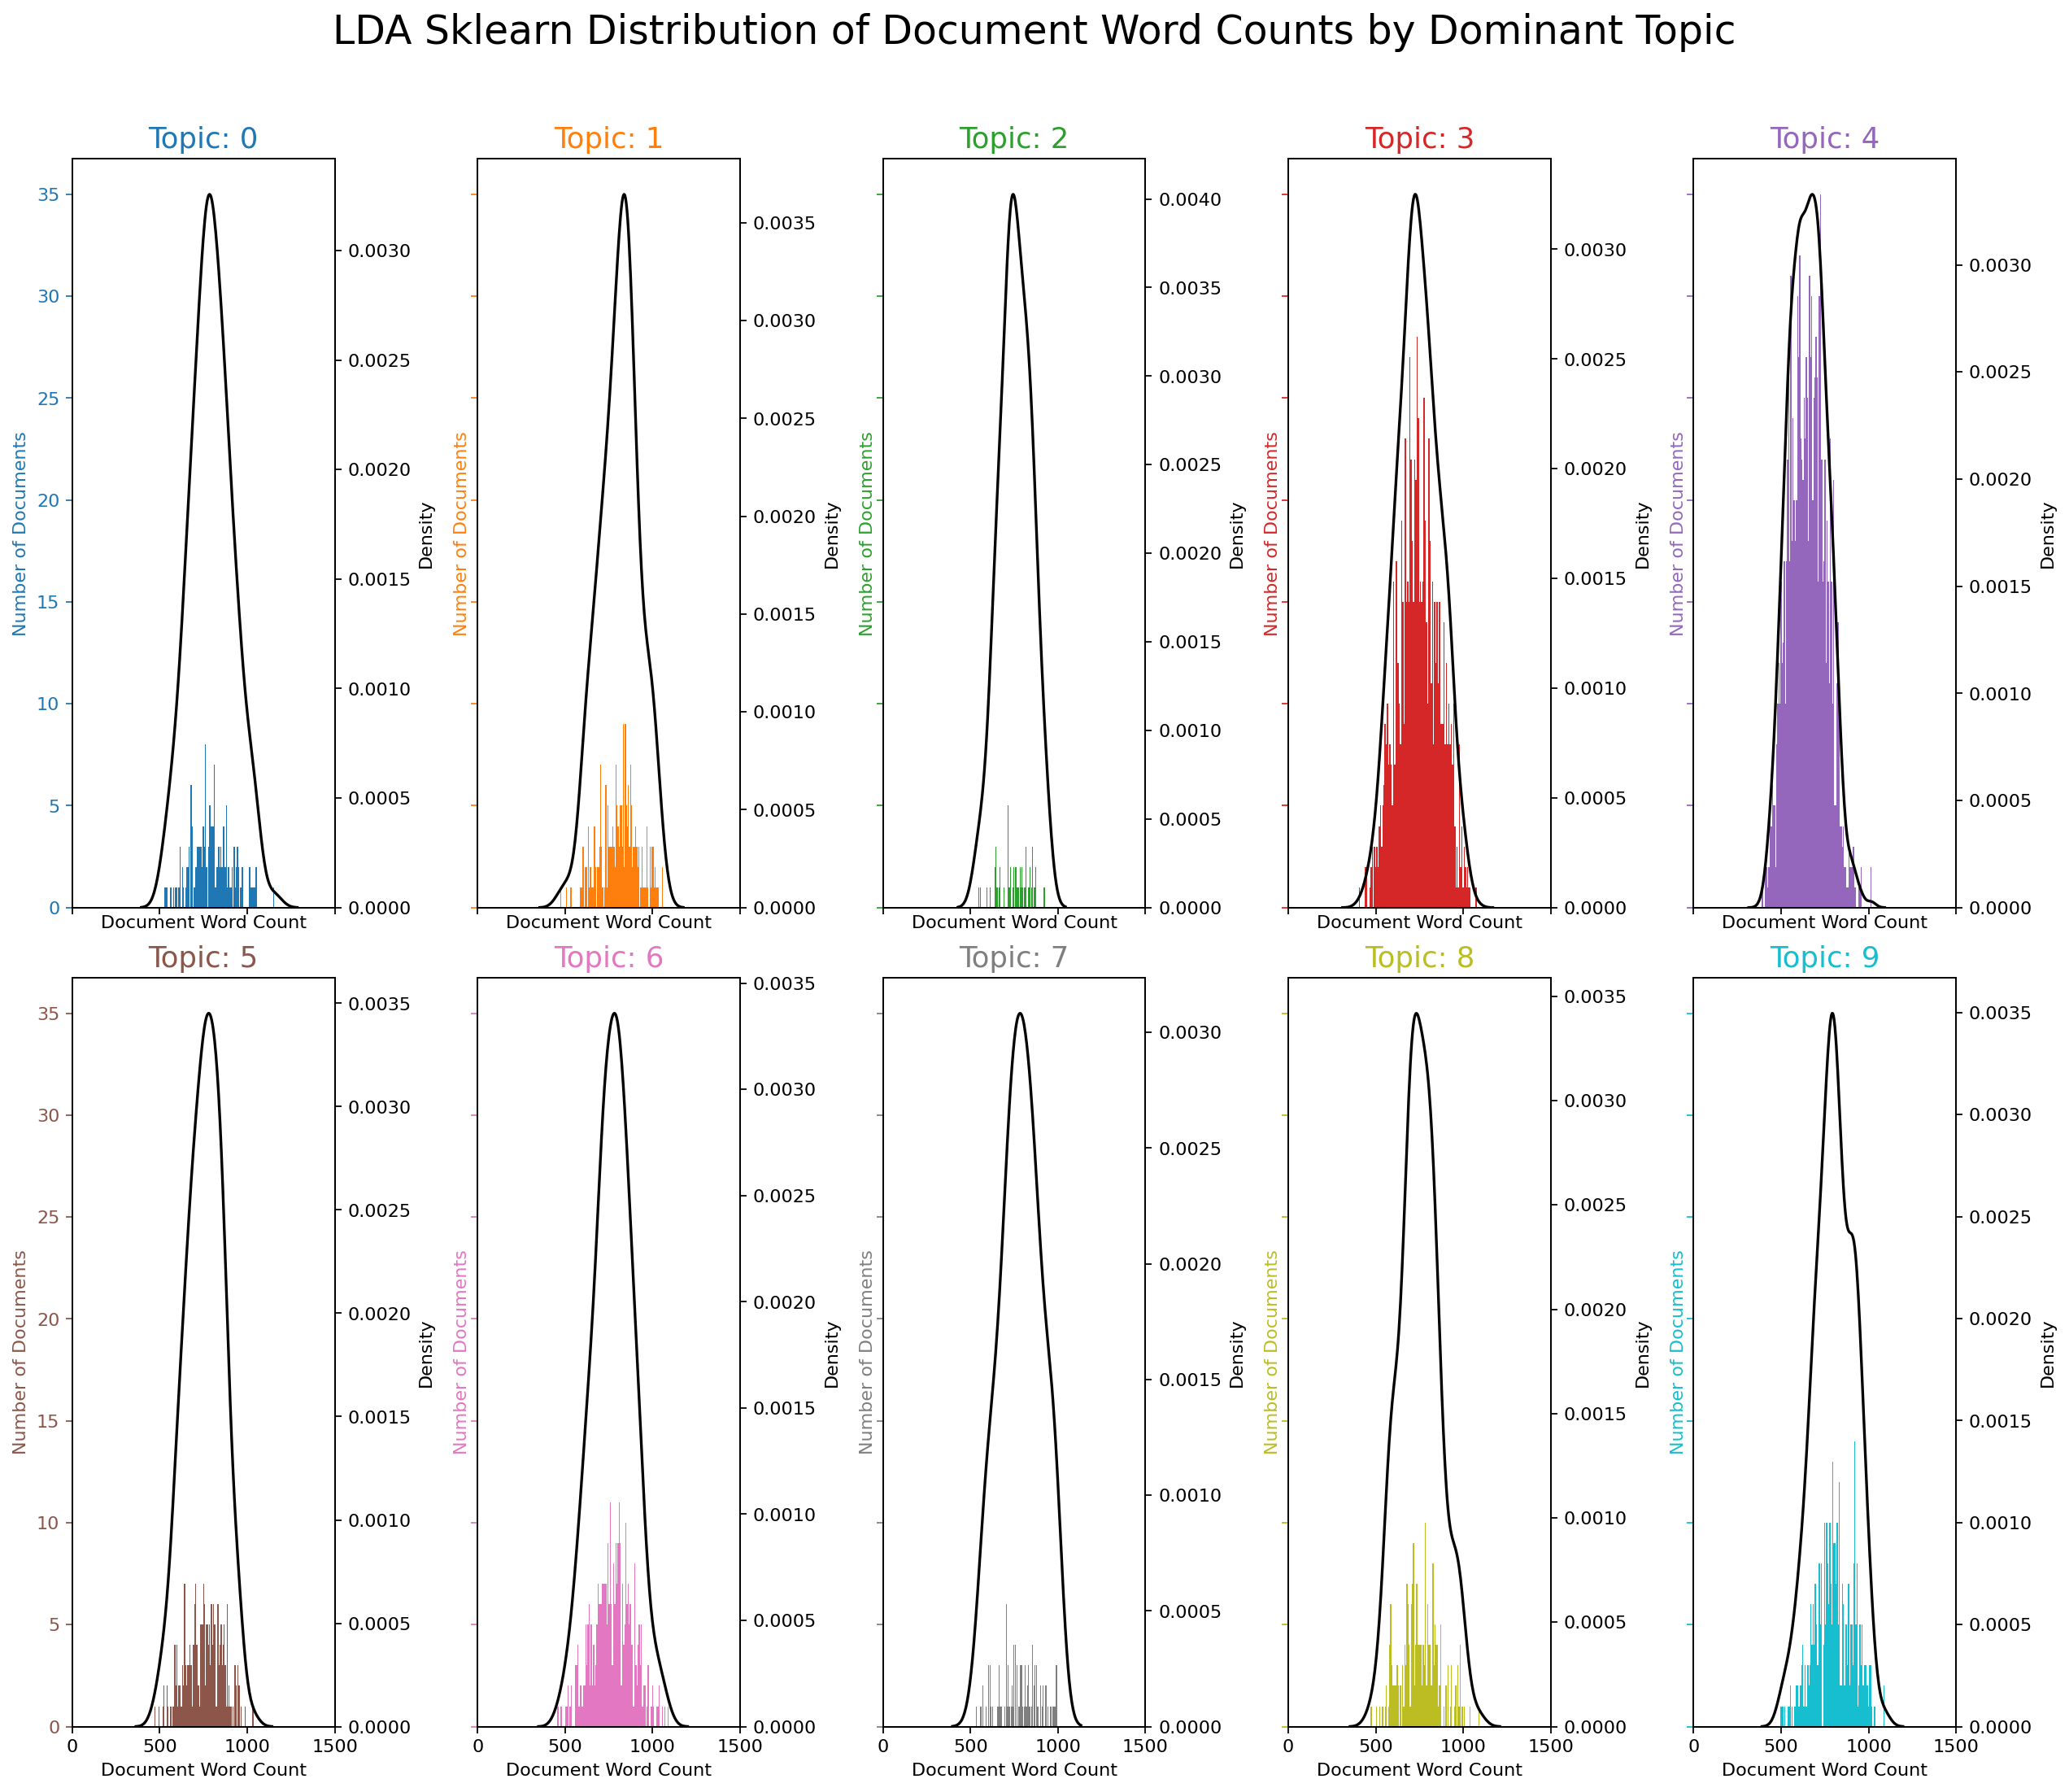

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
#LDA_gensm_dominant_topic
fig, axes = plt.subplots(2,5,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    LDA_sklearn_dominant_topics_sub = LDA_sklearn_dominant_topics.loc[LDA_sklearn_dominant_topics.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in LDA_sklearn_dominant_topics_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1500), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
#plt.xticks(np.linspace(0,100,9))
fig.suptitle('LDA Sklearn Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()
fig.savefig('LDA_sklearn_Distribution_Doc_Dominant_Topic_10.png')   # save the figure to file
plt.close(fig) 

In [ ]:
 # Get main topic in each document
    for text in texts:
        x=model.transform(vectorizer.transform([text]))[0]
        topic_num = np.argmax(x)
        prop_topic=x[topic_num] 
        topic=lda_model_sklearn.components_[topic_num]
        topic_keywords=[vectorizer.get_feature_names()[i] for i in topic.argsort()[:-15:-1]]
        sent_topics_df = sent_topics_df.append(pd.Series([topic_num, round(prop_topic,4), topic_keywords]), ignore_index=True)
            

TypeError: ignored

In [ ]:
fiz=plt.figure(figsize=(15,30))
NUM_TOPICS=8
for i in range(NUM_TOPICS):
    df=pd.DataFrame(lda_model_sklearn.components_[i], columns=['Word','prob']).set_index('Word')
#     df=df.sort_values('prob')
    x=model.transform(vectorizer.transform([text]))[0]
    x[i]
    plt.subplot(5,2,i+1)
    plt.title('Topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()
fig.savefig('LDA_gensm_Key_WordCount_Topic_8.png')   # save the figure to file
plt.close(fig) 

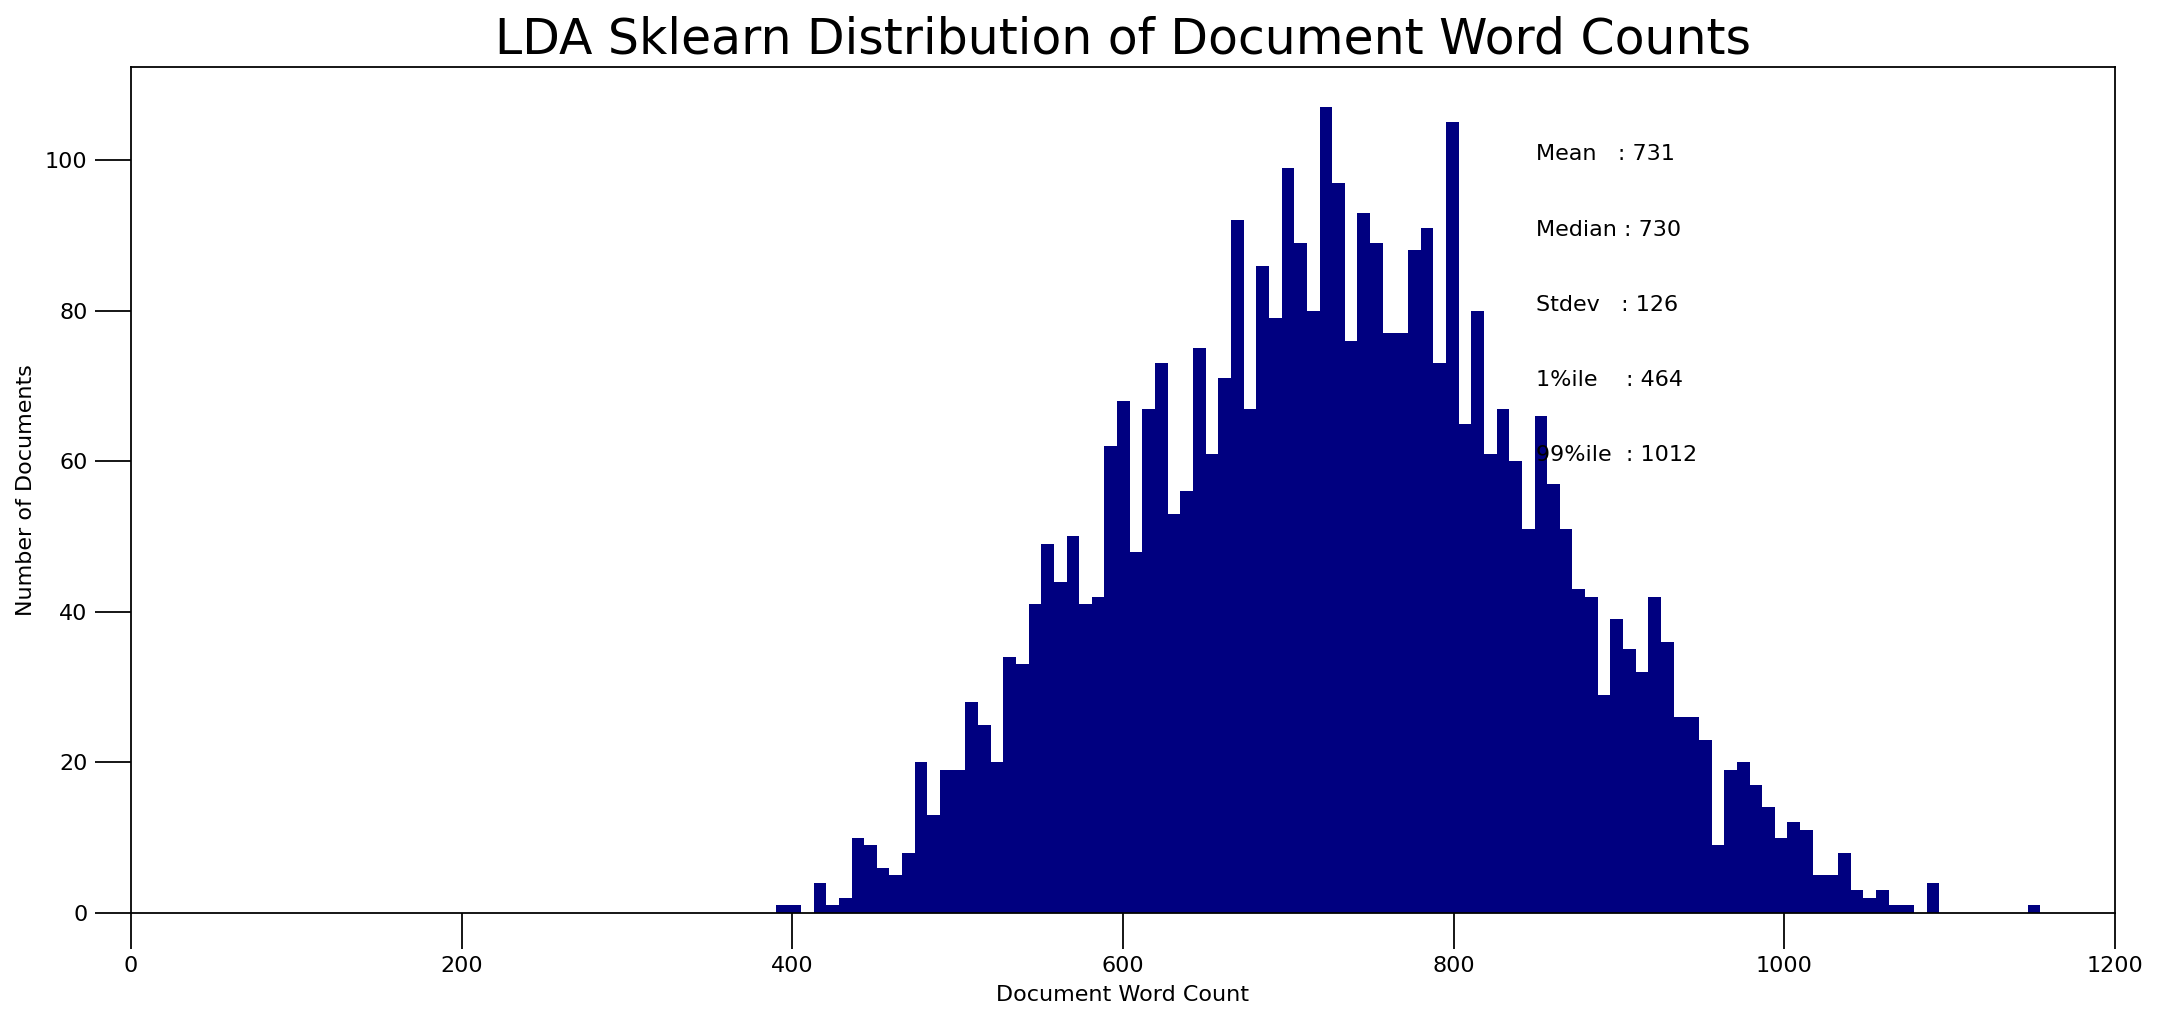

In [ ]:
doc_lens = [len(d) for d in LDA_sklearn_dominant_topics.Text]

# Plot
fig=plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(850, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(850,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(850,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(850,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(850,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1200), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
#plt.xticks(np.linspace(0,100,1200))
plt.title('LDA Sklearn Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()
fig.savefig('LDA_sklearn_Distribution_Doc_10.png')   # save the figure to file
plt.close(fig) 

#Sklearn to run LDA topic modeling

Using Scikit-Learn for Topic Modeling Let’s now go through the same process with sklearn. This librabry offers a NMF implementation as well. The algorithms are more bare-bones than what we’ve seen with gensim but on the plus side, they implement the fit/transform interface we’re used with:

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

panel_lda_sklearn = pyLDAvis.sklearn.prepare(lda_model_sklearn, data_vectorized, vectorizer, mds='tsne')

#save('panel_lda_.html')
pyLDAvis.save_html(panel_lda_sklearn, 'lda_sklearn.html')
panel_lda_sklearn


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  23.035029
3       0.648955  71.707100       2        1  19.354258
6      71.019684   9.971006       3        1  10.441363
9       3.785981  33.185135       4        1  10.413246
5     -42.666500  -9.222070       5        1   7.880336
1      -3.621689 -43.526516       6        1   7.723231
8      -3.632402  -4.171708       7        1   6.703413
7     -36.584400  35.804413       8        1   5.582645
0      44.391380  50.615383       9        1   5.521892
2      40.235809 -31.591665      10        1   3.344588, topic_info=         Term         Freq        Total Category  logprob  loglift
2520  excerpt  1189.000000  1189.000000  Default  30.0000  30.0000
7197     tree   531.000000   531.000000  Default  29.0000  29.0000
7542    water   810.000000   810.000000  Default  28.0000  28.0000
2090      dog   329.000000   329.000000  Default  27.0000  27.0000
2860     food   501.000000   501.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
5141     play    60.183197   196.956415  Topic10  -5.0584   2.2122
5146  playing    45.229892    95.487144  Topic10  -5.3440   2.6506
7700    world    79.677912   574.941966  Topic10  -4.7778   1.4215
2363      end    39.956510   304.517723  Topic10  -5.4680   1.3669
7312   united    37.237155   359.061220  Topic10  -5.5385   1.1316

[674 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
44        1  0.042607  according
44        2  0.108885  according
44        3  0.105098  according
44        4  0.197886  according
44        5  0.165694  according
...     ...       ...        ...
7735      8  0.031545       year
7735      9  0.060725       year
7735     10  0.019716       year
7746      4  0.965876       york
7746      6  0.029093       york

[1592 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 7, 10, 6, 2, 9, 8, 1, 3])

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

panel_nmf_sklearn = pyLDAvis.sklearn.prepare(nmf_model, data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(panel_nmf_sklearn, 'nmf_sklearn.html')
panel_nmf_sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  17.084761
9       0.648955  71.707100       2        1  16.261197
8      71.019684   9.971006       3        1  15.861370
2       3.785981  33.185135       4        1  12.268740
5     -42.666500  -9.222070       5        1  10.437166
6      -3.621689 -43.526516       6        1   8.296235
4      -3.632402  -4.171708       7        1   6.534130
1     -36.584400  35.804413       8        1   5.742689
3      44.391380  50.615383       9        1   4.239753
7      40.235809 -31.591665      10        1   3.273960, topic_info=          Term         Freq        Total Category  logprob  loglift
7542     water  1379.000000  1379.000000  Default  30.0000  30.0000
4616       new  1672.000000  1672.000000  Default  29.0000  29.0000
2090       dog   926.000000   926.000000  Default  28.0000  28.0000
7060      time  1908.000000  1908.000000  Default  27.0000  27.0000
3956  language   744.000000   744.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
3173     great    33.335227   572.886416  Topic10  -5.6278   0.5751
3929      know    30.355497   331.731872  Topic10  -5.7214   1.0278
4595      need    29.581455   319.765298  Topic10  -5.7473   1.0387
4082    likely    30.177225   613.736033  Topic10  -5.7273   0.4067
7735      year    27.392750  1403.750492  Topic10  -5.8241  -0.5175

[724 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
23        3  0.945537   academic
44        1  0.008309  according
44        2  0.226415  according
44        4  0.262766  according
44        5  0.248226  according
...     ...       ...        ...
7746      6  1.000472       york
7753      1  0.086290    zealand
7753      6  0.891663    zealand
7754      2  0.988786       zone
7754      8  0.018656       zone

[2050 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 9, 3, 6, 7, 5, 2, 4, 8])

In [ ]:

#nmf_model.transform(vectorizer.transform([text]))[0]
def index_max(text,model):
  x = model.transform(vectorizer.transform([text]))[0]
  index_max = np.argmax(x)+1
  return [index_max,round(x[index_max-1],4)]

def Assign_Topic(dat_tokens,model):
    Topic=[]
    for text in dat_tokens:
      Topic.append(index_max(text,model))
    return Topic  

for index,topic in enumerate(lda_model_sklearn.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print(.ar[vectorizer.get_feature_names()[i] for i in topic.argsort
              gsort()[:-15:-1]])
    print('\n')
  

In [ ]:
for index,topic in enumerate(lda_model_sklearn.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-15:-1]])
    print('\n')

#5, 7,3,9,10,4,1,6,8,2    

THE TOP 15 WORDS FOR TOPIC #0
['department agriculture', 'da vinci', ', government', 'agriculture .', 'credit report', 'report .', 'endangered specie', ', male', 'war effort', 'natural resource', 'state department', 'mona lisa', 'picnic lunch', '20 year']


THE TOP 15 WORDS FOR TOPIC #1
['united state', 'best express', 'express main', 'century .', 'focus a.', 'century ,', 'world war', 'according passage', '. according', 'state .', 'later ,', 'new york', 'north america', '’ s']


THE TOP 15 WORDS FOR TOPIC #2
['seed ,', ', add', 'seed .', ', score', 'baking soda', 'ingredient ,', 'prey .', 'vegetable ,', 'meat ,', 'fish .', 'mile hour', 'colony .', ', seed', 'range ,']


THE TOP 15 WORDS FOR TOPIC #3
['lens .', 'library congress', '. snow', 'electricity .', 'los angeles', ', library', 'belief ,', 'pattern ,', 'trade route', 'route ,', ', film', 'revolutionary war', 'report ,', 'popular belief']


THE TOP 15 WORDS FOR TOPIC #4
['shoulder .', 'size ,', 'house .', 'surface ,', 'foot long',

In [ ]:

from gensim import similarities
 
lda_index = similarities.MatrixSimilarity(lda_model_nltk[corpus])
text = "The economy is working better than ever"
bow = dictionary.doc2bow(clean_text(text))
 
print(lsi_model_nltk[bow]) 
# Let's perform some queries
similarities = lda_index[lda_model_nltk[bow]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])
# [(104, 0.87591344), (178, 0.86124849), (31, 0.8604598), (77, 0.84932965), (85, 0.84843522), (135, 0.84421808), (215, 0.84184396), (353, 0.84038532), (254, 0.83498049), (13, 0.82832891)]
 
# Let's see what's the most similar document
document_id, similarity = similarities[0]
print(data[document_id][:1000])

[(0, 0.04399641665208139), (1, 0.02912196809425588), (2, 0.021156679761497446), (3, 0.005252131305660218), (4, -0.03623846745262982), (5, 0.007428405452657888), (6, -0.014134144847548144), (7, -0.0021782675347650775), (8, 0.00010376551252620596), (9, -0.001088587667338192), (10, -0.0064457233777623765), (11, -0.002421252172609659), (12, 0.011802963797670603), (13, -0.009280516177034653), (14, 0.012398333435600968)]
[(490, 0.9969436), (1669, 0.9969424), (1870, 0.9969369), (276, 0.9969063), (37, 0.99670815), (182, 0.99670815), (190, 0.99670815), (192, 0.99670815), (195, 0.99670815), (197, 0.99670815)]
 TO8 A1000190 A
A1090490 A
0490.	My sister asked me to give you camera advice. Consider getting one of four kinds of cameras: a 35mm single-lens reflex (SLR), a 35mm rangefinder (RF), a medium format, or a large format. The 35mm is probably the most common and you could get a professional quality one very inexpensively. If you are definitely staying with 35mm film, then an RF camera might b

# Assign Topics and probabilities for each model from Gensm and NLTK

In [ ]:
 
def most_prob(text, model):
  return max((probability,idx) for idx, probability in model[dictionary.doc2bow(clean_text(text))])
  
 
def Assign_topics_Gensm(dat,model):
  i=0
  for text in dat:
    p, idx=most_prob(text,model) 
    idx=idx+1
    df1={'Probability': p,'Topics':idx}
    #print(p,idx)
    df1 =pd.DataFrame(df1, index=[i])
    if i==0:
      df=df1
    else:
      df=pd.concat([df,df1])
    i=i+1
  return df  



In [ ]:
text=train_tokens[0]
lsi_model_nltk[dictionary.doc2bow(clean_text(text))]

In [ ]:

Test_Topics=Assign_topics_Gensm(test_tokens,lda_model_nltk)
#Test_Topics
Test_Topics_lda_nltk=pd.DataFrame(Test_Topics)
Test_Topics_lda_nltk.rename(columns={'Probability':'Probability_lda_nltk','Topics': 'Topics_lda_nltk'},inplace=True)
Test_Topics_lda_nltk


Train_Topics=Assign_topics_Gensm(train_tokens,lda_model_nltk)
#Test_Topics
Train_Topics_lda_nltk=pd.DataFrame(Train_Topics)
Train_Topics_lda_nltk.rename(columns={'Probability':'Probability_lda_nltk','Topics': 'Topics_lda_nltk'},inplace=True)
Train_Topics_lda_nltk



Probability_lda_nltk  Topics_lda_nltk
0                 0.501285                1
1                 0.911012                5
2                 0.970219                9
3                 0.807329                1
4                 0.412258                3
...                    ...              ...
3495              0.668980                4
3496              0.655263                4
3497              0.418358                5
3498              0.708103                4
3499              0.697342                7

[3500 rows x 2 columns]

3500

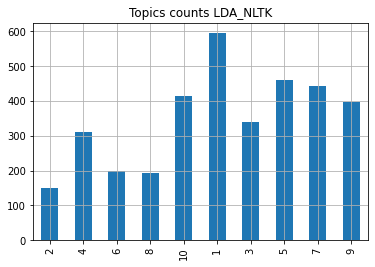

In [ ]:
#dfTgtNames = pd.DataFrame(data.target_names, columns=['Topics'])
#dfTY = pd.DataFrame(list(zip(*(data.target, data.data))), columns=['tgt_id','txt'])
#dfTY = pd.merge(dfTgtNames, dfTY, left_index=True, right_on='tgt_id')
(Train_Topics_lda_nltk.Topics_lda_nltk.value_counts('Topics_lda_nltk', sort=False)*len(Train_Topics_lda_nltk)).plot(kind='bar', grid=True, title='Topics counts LDA_NLTK')



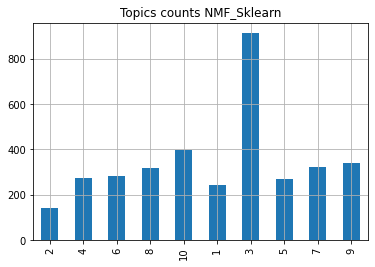

In [ ]:
(Train_Topics_nmf_sklearn.Topics_nmf_sklearn.value_counts('Topics_nmf_sklearn', sort=False)*len(Train_Topics_nmf_sklearn)).plot(kind='bar', grid=True, title='Topics counts NMF_Sklearn')


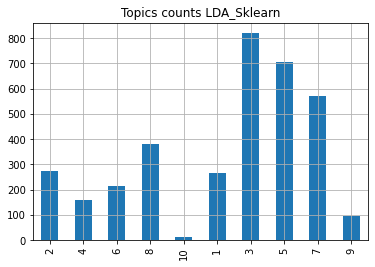

In [ ]:
(Train_Topics_lda_sklearn.Topics_lda_sklearn.value_counts('Topics_lda_sklearn', sort=False)*len(Train_Topics_lda_sklearn)).plot(kind='bar', grid=True, title='Topics counts LDA_Sklearn')
#Topic 3:[('following', 1342.5496690493069), ('excerpt', 782.2665298734576), ('like', 426.82853044701335), ('author', 305.0766478185599), ('little', 279.52713673143177), ('terms', 247.37098348565544), ('long', 238.61932426687727), ('best', 224.250524554121), ('house', 221.20285017733968), ('eyes', 205.6557316732348)]


In [ ]:

Test_Topics=Assign_topics_Gensm(test_tokens,lsi_model_nltk)
#Test_Topics
Test_Topics_lsi_nltk=pd.DataFrame(Test_Topics)
Test_Topics_lsi_nltk.rename(columns={'Probability':'Probability_lsi_nltk','Topics': 'Topics_lsi_nltk'},inplace=True)
Test_Topics_lsi_nltk


Train_Topics=Assign_topics_Gensm(train_tokens,lsi_model_nltk)
#Test_Topics
Train_Topics_lsi_nltk=pd.DataFrame(Train_Topics)
Train_Topics_lsi_nltk.rename(columns={'Probability':'Probability_lsi_nltk','Topics': 'Topics_lsi__nltk'},inplace=True)
#Train_Topics_lsi_nltk


In [ ]:
Test_Topics_lsi_nltk

Probability_lsi_nltk  Topics_lsi_nltk
0                1.663359                1
1                3.069114                1
2                1.911203                1
3                2.458850                1
4                3.513053                7
..                    ...              ...
295              1.339135                1
296              1.801592                1
297              1.840824                1
298              2.254647                1
299              2.315942                1

[300 rows x 2 columns]

In [ ]:
filter=Test_Topics_lsi_nltk['Topics_lsi_nltk'] !=1
Test_Topics_lsi_nltk[filter]


Probability_lsi_nltk  Topics_lsi_nltk
12               0.428673                4
15               0.703083                8
20               0.126031               10
31               0.351451                4
35               0.321950                4
46               0.374116               10
57               0.135228               10
62               0.155004               10
67               0.339542                8
87               0.119355               10
99               0.098176                5
104              0.026277                9
132              0.547318                8
158              0.759133                9
181              0.179947                8
194              0.201649               10
222              0.020203                7
234              0.430673                8
243              0.202808               10
256              0.073287                5
278              0.299404                7
282              0.400348                8

In [ ]:
set(Train_Topics_lsi_nltk['Topics_lsi__nltk'].values)

{1, 2, 4, 5, 6, 7, 8, 9, 10}

In [ ]:

def most_prob(text, model):
  return max((probability,idx) for idx, probability in model[gensm_dictionary.doc2bow(clean_text(text))])
  
 
def Assign_topics_Gensm(dat,model):
  i=0
  for text in dat:
    p, idx=most_prob(text,model) 
    idx=idx+1
    df1={'Probability': p,'Topics':idx}
    #print(p,idx)
    df1 =pd.DataFrame(df1, index=[i])
    if i==0:
      df=df1
    else:
      df=pd.concat([df,df1])
    i=i+1
  return df  
Test_Topics=Assign_topics_Gensm(test_tokens,lda_model_gensm)
#Test_Topics
Test_Topics_lda_gensm=pd.DataFrame(Test_Topics)
Test_Topics_lda_gensm.rename(columns={'Probability':'Probability_lda_gensm','Topics': 'Topics_lda_gensm'},inplace=True)
Test_Topics_lda_gensm


Train_Topics=Assign_topics_Gensm(train_tokens,lda_model_gensm)
#Test_Topics
Train_Topics_lda_gensm=pd.DataFrame(Train_Topics)
Train_Topics_lda_gensm.rename(columns={'Probability':'Probability_lda_gensm','Topics': 'Topics_lda_gensm'},inplace=True)
Train_Topics_lda_gensm

Probability_lda_gensm  Topics_lda_gensm
0                  0.717225                 1
1                  0.464532                 1
2                  0.653457                14
3                  0.766044                11
4                  0.921584                 1
...                     ...               ...
3495               0.647509                 8
3496               0.953333                 8
3497               0.916735                 8
3498               0.905850                 8
3499               0.607418                 9

[3500 rows x 2 columns]

In [ ]:
#output and save those files
[len(train_tokens),len(test_tokens)]

len(train_processed_docs),len(tokenized_data)
pd.DataFrame(tokenized_data).to_csv('tokenized_data.csv')
pd.DataFrame(train_processed_docs).to_csv('train_processed_docs.csv')
pd.DataFrame(train_tokens).to_csv('train_tokens.csv')
pd.DataFrame(test_tokens).to_csv('test_tokens.csv')

In [ ]:
#train_processed_docs=pd.read_csv('https://raw.githubusercontent.com/yaolihua081/AIG_PC/main/train_processed_docs.csv')
#train_processed_docs.shape#3500,133
#tokenized_data=pd.read_csv('https://raw.githubusercontent.com/yaolihua081/AIG_PC/main/tokenized_data.csv')
#tokenized_data.shape#3500,146
#train_token=pd.read_csv('https://raw.githubusercontent.com/yaolihua081/AIG_PC/main/train_tokens.csv')


(3500, 146)

In [ ]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA_Sklearn Model:")
print_topics(lda_model_sklearn, vectorizer)
print("=" * 20)
 
print("NMF_Sklearn Model:")
print_topics(nmf_model, vectorizer)
print("=" * 20)
 
print("LSI_sklearn Model:")
print_topics(lsi_model_sklearn, vectorizer)
print("=" * 20)
 

LDA_Sklearn Model:
Topic 0:
[('water', 373.4772076880263), ('glass', 164.9679381465474), ('used', 162.96031837858018), ('paper', 161.96890107598995), ('oil', 154.23525705372094), ('based', 151.6913228306201), ('add', 147.62109807311035), ('food', 144.7044342225224), ('make', 134.13944800336586), ('just', 116.17958601765469)]
Topic 1:
[('american', 192.0394504046916), ('war', 184.5088322971615), ('art', 161.44250340712495), ('world', 160.07140772198144), ('century', 132.60375484121806), ('began', 126.00663378074573), ('published', 124.41022068106808), ('years', 124.28314272299846), ('history', 119.74098675223001), ('women', 114.68366019426648)]
Topic 2:
[('following', 1342.5496690493069), ('excerpt', 782.2665298734576), ('like', 426.82853044701335), ('author', 305.0766478185599), ('little', 279.52713673143177), ('terms', 247.37098348565544), ('long', 238.61932426687727), ('best', 224.250524554121), ('house', 221.20285017733968), ('eyes', 205.6557316732348)]
Topic 3:
[('language', 192.02

#Implement Similarity

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

text = test_tokens[1] 
x = nmf_model.transform(vectorizer.transform([text]))[0]
print(x)
def most_similar(x, Z, top_n=5):
    dists = euclidean_distances(x.reshape(1, -1), Z)
    pairs = enumerate(dists[0])
    most_similar = sorted(pairs, key=lambda item: item[1])[:-top_n:-1]
    #most_similar = sorted(pairs, key=lambda item: item[1])[:top_n]
    #most_similar = sorted(pairs, key=lambda item: item[1])[:-5]
    return most_similar
 
similarities = most_similar(x, nmf_Z)
document_id, similarity = similarities[0]
print(data[document_id][:1000])

[0.3077672  0.         0.         0.         0.         0.00084712
 0.02509472 0.         0.13971953 0.05073371]
 TO11 A2000244 B
A2090844 B
0844.	Traditionally, management of water resources has focused on surface water or ground water as if they were separate entities. As the development of land and water resources increases, it is apparent that development of either of these resources affects the quantity and quality of the other. Nearly all surface-water features (streams, lakes, reservoirs, wetlands, and estuaries) interact with ground water. These interactions take many forms. In many situations, surface-water bodies gain water and solutes from ground-water systems and in others the surface-water body is a source of ground-water recharge and causes changes in ground-water quality. As a result, withdrawal of water from streams can deplete ground water or conversely, pumpage of ground water can deplete water in streams, lakes, or wetlands. Pollution of surface water can cause degra

In [ ]:
similarities

[(844, 2.27915293379289),
 (2964, 1.980388561990109),
 (3100, 1.777559810564699),
 (1895, 1.7120471530762722)]

In [ ]:
print(text)
document_id, similarity = similarities[0]
print(data[document_id])

 TO45 A1000401 B
A1093501 B
3501.	Though she had been a carpenter for seven years, Hannah had never worked in a shop she could call her own. She had always relied on leased spaces, which reduced her overall profits. After working out cost estimates, she decided to build a workshop on a vacant portion of her property in order to eliminate her monthly rental payment. As she began thinking through her plans, she realized having her own workshop would yield additional benefits. For example, by avoiding the commute to and from the leased space, she could spend more time being productive. She would be able to install a built-in surveillance system for added security. She could also have a small seating area for meetings with clients, where some of her finished products—such as cabinets, tables, and chairs—could be displayed. Within six months, Hannah’s workshop was completed, and over time, it paid off as one of the best business investments she had ever made.

According to the passage, Hann

#Plotting words and documents in 2D with SVD
We can use SVD with 2 components (topics) to display words and documents in 2D. The process is really similar. Let’s start with displaying documents since it’s a bit more straightforward.

In [ ]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

In [ ]:
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(data_vectorized)
 
df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = documents_2d[:,0], documents_2d[:,1], range(len(data))
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [ ]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(data_vectorized.T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

#Assign topics to each PC items by LDA, LSI, NMF from Sklearn package

In [ ]:
'''
 for each text, choose the highest probability,
 Assign the topic for each document
'''
import numpy as np
#nmf_model.transform(vectorizer.transform([text]))[0]
def index_max(text,model):
  x = model.transform(vectorizer.transform([text]))[0]
  index_max = np.argmax(x)+1
  return [index_max,round(x[index_max-1],4)]

def Assign_Topic(dat_tokens,model):
    Topic=[]
    for text in dat_tokens:
      Topic.append(index_max(text,model))
    return Topic   



In [ ]:
Test_Topics=Assign_Topic(test_tokens,lsi_model_sklearn)     
Test_Topics_lsi_sklearn=pd.DataFrame(Test_Topics,columns=['Topics_lsi_sklearn','Probability_lsi_sklearn']) 
Train_Topics=Assign_Topic(train_tokens, lsi_model_sklearn)     
Train_Topics_lsi_sklearn=pd.DataFrame(Train_Topics,columns=['Topics_lsi_sklearn','Probability_lsi_sklearn']) 

Test_Topics=Assign_Topic(test_tokens,lda_model_sklearn)     
Test_Topics_lda_sklearn=pd.DataFrame(Test_Topics,columns=['Topics_lda_sklearn','Probability_lda_sklearn']) 
Train_Topics=Assign_Topic(train_tokens, lda_model_sklearn)     
Train_Topics_lda_sklearn=pd.DataFrame(Train_Topics,columns=['Topics_lda_sklearn','Probability_lda_sklearn']) 

In [ ]:
Test_Topics=Assign_Topic(test_tokens,nmf_model)     
Test_Topics_nmf_sklearn=pd.DataFrame(Test_Topics,columns=['Topics_nmf_sklearn','Probability_nmf_sklearn']) 
Train_Topics=Assign_Topic(train_tokens, nmf_model)     
Train_Topics_nmf_sklearn=pd.DataFrame(Train_Topics,columns=['Topics_nmf_sklearn','Probability_nmf_sklearn']) 

#Assign Topics by LDA from gensem

In [ ]:
text = "The economy is working better than ever"
bow = dictionary.doc2bow(clean_text(text))

print(lda_model[bow])
# [(0, 0.020005183), (1, 0.020005869), (2, 0.02000626), (3, 0.020005472), (4, 0.020009108), (5, 0.020005926), (6, 0.81994385), (7, 0.020006068), (8, 0.020006327), (9, 0.020005994)]
 

[(0, 0.020004738), (1, 0.020005247), (2, 0.02000424), (3, 0.38480148), (4, 0.4551603), (5, 0.020002205), (6, 0.020009995), (7, 0.020002494), (8, 0.020001678), (9, 0.020007651)]


In [ ]:
'''
Identify item ID and keys for each PC items
'''

import re
def Assign_id(PCdoc):
  ID_pattern=r'([A-B][\d]{6,7})'
  IDs = re.findall(ID_pattern, PCdoc)
  IDs_unique=IDs[1]
  Key_pattern=r'(\b[A-D]\b)'
  Keys=re.findall(Key_pattern, PCdoc)
  Keys_unique=Keys[1] 
  num=str(IDs_unique)[7:10]
  df ={'ID_Name':IDs_unique ,'Key':Keys_unique }
  df=pd.DataFrame(df,index=[num])
  return df

def ID(PC_tokens):
  i=0
  for PCdoc in PC_tokens:
    df1=Assign_id(PCdoc)
    if i==0:
      df=df1
    else:    
      df=pd.concat([df, df1])
    i=i+1   
  return df

#Test_ID=ID(test_tokens)


#Train_ID=ID(train_tokens)



In [ ]:
print(all_tokens[0])

 TO9 A2000380 D 
A2090000 D
0000.	Today we may take for granted that blue jeans are indeed blue, but what are the origins of that color? Before synthetic dyes were developed, the indigo plant was responsible for supplying the world's textile industry with a deep, rich blue color. The indigo plant is native to several areas of the world, including southern and eastern Africa, tropical America, and Asia, but it was in India that the industry truly flourished. The British established commercial cultivation of indigo in the 18th century, using the dye for military and hospital uniforms, as well as for working class garments. This lasted until the early 20th century, when the use of synthetic alternatives caused the industry to collapse. Today, however, health and pollution concerns have resulted in an increasing demand for natural dyes, and we may see the indigo industry succeed again.

According to the passage, the natural indigo industry

A.	once supplied fabric for British military unif

In [ ]:
all=pd.concat([all_ID,all_tokens],axis=1)

TypeError: ignored

# Combine to create files for Item ID, Topics, probability, from different models

Test_Item
Train_Item

In [ ]:
 '''
 Cobine, train and test data, assign Item ID, Key, and Topics
 '''
 def combineTopics(Test_ID, Test_Topics):
   temp=pd.DataFrame(Test_ID['ID_Name'].values)
   temp1=pd.concat([temp,pd.DataFrame(Test_Topics[Test_Topics.columns.values[0]].values)],axis=1).reindex(temp.index)
 
   temp2=pd.concat([temp1,pd.DataFrame(Test_Topics[Test_Topics.columns.values[1]].values)],axis=1).reindex(temp1.index)
   temp2=pd.concat([temp2,pd.DataFrame(Test_ID['Key'].values)],axis=1).reindex(temp2.index)
   #temp2.columns=['ID_Name','Topics','Probability','Answer_Key']
   temp2.columns=['ID_Name',Test_Topics.columns.values[0],Test_Topics.columns.values[1],'Answer_Key']
   return temp2

 

In [ ]:
Test_Item_lda_sklearn=combineTopics(Test_ID, Test_Topics_lda_sklearn)
Train_Item_lda_sklearn=combineTopics(Train_ID, Train_Topics_lda_sklearn)
Test_Item_lsi_sklearn=combineTopics(Test_ID, Test_Topics_lsi_sklearn)
Train_Item_lsi_sklearn=combineTopics(Train_ID, Train_Topics_lsi_sklearn)
Test_Item_nmf_sklearn=combineTopics(Test_ID, Test_Topics_nmf_sklearn)
Train_Item_nmf_sklearn=combineTopics(Train_ID, Train_Topics_nmf_sklearn)

In [ ]:
Test_Item_lda_nltk=combineTopics(Test_ID, Test_Topics_lda_nltk)
Train_Item_lda_nltk=combineTopics(Train_ID, Train_Topics_lda_nltk)
Test_Item_lsi_nltk=combineTopics(Test_ID, Test_Topics_lsi_nltk)
Train_Item_lsi_nltk=combineTopics(Train_ID, Train_Topics_lsi_nltk)


In [ ]:
Test_Item_lda_gensm=combineTopics(Test_ID, Test_Topics_lda_gensm)
Train_Item_lda_gensm=combineTopics(Train_ID, Train_Topics_lda_gensm)



In [ ]:
temp=pd.merge(Test_Item_lda_sklearn,   Test_Item_nmf_sklearn,how='inner')
Test_Item_sklearn=pd.merge(Test_Item_lsi_sklearn,temp,how='inner')

temp=pd.merge(Train_Item_lda_sklearn,   Train_Item_nmf_sklearn,how='inner')
Train_Item_sklearn=pd.merge(Train_Item_lsi_sklearn,temp,how='inner')

In [ ]:
filter1=Train_Item['Topics_lda_sklearn']==Train_Item['Topics_lsi_sklearn']
filter2=Train_Item['Topics_lda_sklearn']==Train_Item['Topics_nmf_sklearn']
filter3=Train_Item['Topics_lsi_sklearn']==Train_Item['Topics_nmf_sklearn']
sum(filter1),sum(filter2), sum(filter3)

(433, 202, 533)

In [ ]:
temp=pd.merge(Test_Item_lda_sklearn,   Test_Item_lda_nltk,how='inner')
Test_Item_Ida_all=pd.merge(Test_Item_lda_gensm,temp,how='inner')

temp=pd.merge(Train_Item_lda_sklearn,   Train_Item_lda_nltk,how='inner')
Train_Item_Ida_all=pd.merge(Train_Item_lda_gensm,temp,how='inner')


In [ ]:
Test_Item_Isi_all=pd.merge(Test_Item_lsi_sklearn,   Test_Item_lsi_nltk,how='inner')
Train_Item_Isi_all=pd.merge(Train_Item_lsi_sklearn,   Train_Item_lsi_nltk,how='inner')


#OutPut Topics and their probabilities for each Items from all models

In [ ]:
Test_Item_sklearn.to_csv('PCItem35-37_Topics_sklearn.csv')
Train_Item_sklearn.to_csv('PCItem00-35_Topics_sklearn.csv')

Test_Item_Ida_all.to_csv('PCItem35-37_Topics_Ida.csv')
Train_Item_Ida_all.to_csv('PCItem00-35_Topics_Ida.csv')

Test_Item_Isi_all.to_csv('PCItem35-37_Topics_Isi.csv')
Train_Item_Isi_all.to_csv('PCItem00-35_Topics_Isi.csv')

# Read in CVS files

In [ ]:
Test_Item_sklearn=pd.read_csv('PCItem35-37_Topics_sklearn.csv')
Train_Item_sklearn=pd.read_csv('PCItem00-35_Topics_sklearn.csv')


Test_Item_Ida_all=pd.read_csv('PCItem35-37_Topics_Ida.csv')
Train_Item_Ida_all=pd.read_csv('PCItem00-35_Topics_Ida.csv')

Test_Item_Isi_all=pd.read_csv('PCItem35-37_Topics_Isi.csv')
Train_Item_Isi_all=pd.read_csv('PCItem00-35_Topics_Isi.csv')



In [ ]:
pd.DataFrame(train_tokens).to_csv('train_tokens.csv')
pd.DataFrame(test_tokens).to_csv('test_tokens.csv')

# Check term distributions in each topics 

# plot pyLDAvis for :LDA_sklearn, with num_topics=10 and 20. For 20 topics, ther eare two s;lightly overlap

#t-SNE Clustering Chart
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model_nltk[corpus]):
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values
# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3432 samples in 0.006s...
[t-SNE] Computed neighbors for 3432 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3432
[t-SNE] Computed conditional probabilities for sample 2000 / 3432
[t-SNE] Computed conditional probabilities for sample 3000 / 3432
[t-SNE] Computed conditional probabilities for sample 3432 / 3432
[t-SNE] Mean sigma: 0.000182


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.683350


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max


[t-SNE] KL divergence after 1000 iterations: 0.539687


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
# Show
sent_topics_sorteddf_mallet.head(10)

In [ ]:
Train_Item_Ida_all

ID_Name  Probability_lda_gensm  ...  Probability_lda_nltk Topics_lda_nltk
0     A2090000               0.717225  ...              0.501285               1
1     A2090001               0.464532  ...              0.911012               5
2     A2090002               0.653457  ...              0.970219               9
3     A2090003               0.766044  ...              0.807329               1
4     A2090003               0.921584  ...              0.412258               3
...        ...                    ...  ...                   ...             ...
3495  B5093495               0.647509  ...              0.668980               4
3496  B5093496               0.953333  ...              0.655263               4
3497  B5093497               0.916735  ...              0.418358               5
3498  B5093498               0.905850  ...              0.708103               4
3499  B5093499               0.607418  ...              0.697342               7

[3500 rows x 8 columns]

In [ ]:
print(train_tokens[0])
#panel.token_table
#combined=panel
#combined.save('LDA_Topic5.html')
#from google.colab import files
#files.download('LDA_Topics5.html')
#combined

 TO9 A2000380 D 
A2090000 D
0000.	Today we may take for granted that blue jeans are indeed blue, but what are the origins of that color? Before synthetic dyes were developed, the indigo plant was responsible for supplying the world's textile industry with a deep, rich blue color. The indigo plant is native to several areas of the world, including southern and eastern Africa, tropical America, and Asia, but it was in India that the industry truly flourished. The British established commercial cultivation of indigo in the 18th century, using the dye for military and hospital uniforms, as well as for working class garments. This lasted until the early 20th century, when the use of synthetic alternatives caused the industry to collapse. Today, however, health and pollution concerns have resulted in an increasing demand for natural dyes, and we may see the indigo industry succeed again.

According to the passage, the natural indigo industry

A.	once supplied fabric for British military unif

In [ ]:
filter=Train_Item_Ida_all['Probability_lda_sklearn'] > 0.8
#df=pd.DataFrame(Train_Item[filter].index,Train_Item[filter]['Topics','Probability'])
#df.columns=['ID_Name','Topics','Probability','Answer_Key']
#df
#(Train_Item[filter]['Topics']).unique()
sum(filter)
Train_08=Train_Item_Ida_all[filter]
temp=Train_08.groupby(['Topics_lda_sklearn']).count().sort_values(by='ID_Name')[:-5:-1]
TopicOne=temp.index.values[0]#topic 7 that has most items with high probability
TopicTwo=temp.index.values[1]
TopicOne,TopicTwo#9,2
temp

Unnamed: 0  ID_Name  ...  Probability_lda_nltk  Topics_lda_nltk
Topics_lda_sklearn                       ...                                       
9                          109      109  ...                   109              109
2                           28       28  ...                    28               28
1                           17       17  ...                    17               17
4                           15       15  ...                    15               15

[4 rows x 8 columns]

In [ ]:


filter=Train_Item_Ida_all['Topics_lda_sklearn']==TopicOne
Train_Item_Highest_Probability=Train_Item_Ida_all[filter].sort_values(by='Probability_lda_sklearn')[:-5:-1].index.values[0]
#item 15, 1032, identified to be topic 8(1-10) with very high probability
Train_Item_Ida_all[filter].sort_values(by='Probability_lda_sklearn')[:-15:-1]

Unnamed: 0   ID_Name  ...  Probability_lda_nltk  Topics_lda_nltk
127          127  A3090127  ...              0.571689                7
212          212  A1090212  ...              0.992173                7
360          360  B2090360  ...              0.728289                4
104          104  A1090104  ...              0.991174                6
91            91  B2090091  ...              0.288735                1
378          378  A2090378  ...              0.991587                4
63            63  B1090063  ...              0.990624                7
430          430  A2090430  ...              0.738646               10
383          383  A1090383  ...              0.988605               10
140          140  B5090140  ...              0.519373                3
1124        1124  A2091124  ...              0.919990                9
353          353  A3090353  ...              0.991665                4
723          723  A3090723  ...              0.547304                6
3024        3024  A3093024  ...              0.938957                7

[14 rows x 9 columns]

In [ ]:
# LDA_Sklearn identified to be topic 9 with high probability
#LDA_NLTK identified with topic 7 with high probability
print(train_tokens[127])
print(train_tokens[212])# this item, all model identified withvery high probability
#LDA_nltk---7
#LDA_Sklearn---9
print(train_tokens[63])
print(train_tokens[3024])
#NLTK ifentified ti bt topics 10, items 430,383
print(train_tokens[430])
print(train_tokens[383])

 TO2 A3000027 D
A3090127 A
0127.	Ann (or Marian) Evans, known by her pen name George Eliot, was born in 1819 in central England, where her father managed Arbury Estate's farms. Before she was a year old, her family moved to Griff, where they would reside until Eliot reached adulthood. Between 1828 and 1832, Eliot attended boarding school in Nuneaton, where she was heavily influenced by the school's governess, who instilled a strong religious sensibility in her. From 1832 to 1835, in the nearby town of Coventry, Eliot attended another school administered by daughters of a Baptist minister. Her education was cut short at age 17 when her mother died. Being the youngest child, she returned home to run her father's household. In 1841 she and her father moved to Coventry, where Eliot met Caroline and Charles Bray and was influenced by them to embrace more progressive ideas. After her father's death, Eliot advanced her education through her own intensive reading. These experiences, localities

In [ ]:
Train_Item[filter].sort_values(by='Probability')[:-5:-1]

ID_Name  Topics  Probability Answer_Key
15    A3090015       7       0.9909          D
1032  B2091032       7       0.9890          D
20    A3090020       7       0.9890          A
93    B2090093       7       0.9887          A

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
import hashlib
import matplotlib.style as style
style.use('fivethirtyeight')

plt.scatter(cars_data.Horsepower, cars_data.Miles_per_Gallon)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('First scatter plot!')
plt.show()

for region in cars_data.Origin.unique():
  data_subset = cars_data[cars_data.Origin == region]
  plt.scatter(data_subset.Horsepower, data_subset.Miles_per_Gallon, label=region)

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Second scatter plot!')
plt.legend()
plt.show()

figsize=(15,15)
sns.lineplot(x='month', y='cases_per_ten_thosand',color='blue',data=month_case)
sns.lineplot(x='month', y='death_per_ten_thosand',color='red',data=month_death)

#sns.lineplot(x='month', y='total_cases',color='blue',data=month_case)
#sns.lineplot(x='month', y='total_deaths',color='red',data=month_death)
plt.title('USA COVID-19 Cases and Deaths By Month')
plt.show()


style.use('fivethirtyeight')

plt.figure(figsize=(10, 10))
sns.lineplot(x='Year',y='total_deaths', hue='Cause_group', data=CA_dat)
plt.title("Total death in California grouped by the Cause without COVID_19 data by 2020-10-6")
plt.show()


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
import hashlib
import matplotlib.style as style
style.use('fivethirtyeight')


In [ ]:
style.use('fivethirtyeight')

plt.figure(figsize=(10, 10))
sns.barplot(x='Topics_lad_sklearn',y='Probability_lda_sklearn', hue='Topics_lda_nltk', data=Train_Item_Ida_all)
plt.title("The highest Probabilty for each Item by LDA with 10 Topics")
plt.show()


NameError: ignored

In [ ]:
Train_Item_Ida_all

ID_Name  Probability_lda_gensm  ...  Probability_lda_nltk Topics_lda_nltk
0     A2090000               0.717225  ...              0.501285               1
1     A2090001               0.464532  ...              0.911012               5
2     A2090002               0.653457  ...              0.970219               9
3     A2090003               0.766044  ...              0.807329               1
4     A2090003               0.921584  ...              0.412258               3
...        ...                    ...  ...                   ...             ...
3495  B5093495               0.647509  ...              0.668980               4
3496  B5093496               0.953333  ...              0.655263               4
3497  B5093497               0.916735  ...              0.418358               5
3498  B5093498               0.905850  ...              0.708103               4
3499  B5093499               0.607418  ...              0.697342               7

[3500 rows x 8 columns]

In [ ]:
import altair as alt
alt_chart=alt.Chart(Train_Item_Ida_all,title="Topics and probability for Each item").mark_point().encode(
    x='Topics_lda_sklearn:N',
    y='Topics_lda_sklearn.value_counts  :Q',
    color='Probability_lda_sklearn:Q',
    tooltip='Topics_lda_nltk:N'
).interactive()

alt_chart


alt.Chart(...)

In [ ]:
plt.bar('Topics', 'Probability', width=0.8, bottom=None, align='center', data=Train_Item)


In [ ]:
'''
Identify item ID and keys for each PC items
'''

import re
def Assign_id(PCdoc):
  ID_pattern=r'([A-B][\d]{6,7})'
  IDs = re.findall(ID_pattern, PCdoc)
  IDs_unique=IDs[1]
  Key_pattern=r'(\b[A-D]\b)'
  Keys=re.findall(Key_pattern, PCdoc)
  Keys_unique=Keys[1] 
  num=str(IDs_unique)[7:10]
  #pattern1=r'([^.?!]*(?<=[.?\s!])According to(?=[\s.?!])[^.?!]*[.?!])'
  #pattern2=r'([^.?!]*(?<=[.?\s!])Based on(?=[\s.?!])[^.?!]*[.?!])'
  #question=re.findall(pattern1,PCdoc) + re.findall(pattern2,PCdoc)
  key=str(Keys_unique)+str(".")
  part1="([^.?!]*(?<=[.?\s!])(?<=![\d]{4}[.])According to"
  part2="([^.?!]*(?<=[.?\s!])Based on"
  part5="([^.?!]*(?<=[.?\s!])Which of"
  #part6="([^.?!]*(?<=[.?\s!])The passage"
  part6="([.?\s]The passage"
  part7="([^.?!]*(?<=[.?\s!])In writing the passage"
  part8="([^.?!]*(?<=[.?\s!])What was"
  part9="([^.?!]*(?<=[.?\s!])How does the author"
  part10="([.?\s] In the passage"
  part11="([^.?!]*(?<=[.?\s!]) The author"
  part3="([^.?!]*(?<=[.?\s!])"
  part4="(?=[\s.?!])[^.?!]*[.?!])"
  #part3="([^.?!]*(?<=[.?\s!])"
  #part4="(?=[\s.?!])[^.?!]*[.?!])"
  part00="(?=[\s.?!])[^.?!]*[.?\s!])"
  pattern1=str(part1)+str(part4)
  pattern2=str(part2)+str(part4)
  pattern3=str(part3)+str(key)+str(part00)
  pattern4=str("(")+str(key)+str(part00)
  #question=re.findall(pattern1,PCdoc)+re.findall(pattern2,PCdoc)
  #ans=re.findall(pattern4,PCdoc)
  pattern5=str(part5)+str(part4)
  pattern6=str(part6)+str(part4)
  pattern7=str(part7)+str(part4)
  pattern8=str(part8)+str(part4)
  pattern9=str(part9)+str(part4)
  pattern10=str(part10)+str(part4)
  pattern11=str(part11)+str(part4)
  #pattern3=str(part3)+str(key)+str(part4)
  question=re.findall(pattern1,PCdoc)+re.findall(pattern2,PCdoc)+re.findall(pattern3,PCdoc)+re.findall(pattern5,PCdoc)+re.findall(pattern6,PCdoc)+re.findall(pattern7,PCdoc)+re.findall(pattern8,PCdoc)+re.findall(pattern9,PCdoc)+re.findall(pattern10,PCdoc)+re.findall(pattern11,PCdoc)
  answer=re.findall(pattern4,PCdoc)
  #print(type(question),len(question),question[0],answer[0])
  questr = question[0].replace("\n", " ")
  questr = questr.replace("\t", " ")
  questr = questr.replace("A.", " ")
  questr = questr.replace(key, " ")
  anstr = answer[len(answer)-1].replace(key, "")   
  anstr = anstr.replace("\t", "")
  print([questr,anstr])
  df ={'ID_Name':IDs_unique ,'Key':Keys_unique ,'Question': questr,'Answer': anstr}
  df=pd.DataFrame(df,index=[num])
  return df
def ID(PC_tokens):
  df=pd.DataFrame()
  i=0
  for PCdoc in PC_tokens:
    df=pd.concat([df, Assign_id(PCdoc)]) 
    i=i+1
    print(i) 
  return df
all_ID=ID(all_tokens)
all_ID